 # Course project II

I have performed a data analysis of approximately 385,000 food products in JupyterLab. The dataset contains a vast range of information, including product codes, product names, ingredients, nutritional content, product origins, manufacturing dates, and other data. The data was collected from the Open Food repository (Ref. https://bit.ly/3nfummU).

The aim of this project is to apply the knowledge acquired in the second chapter of the course, "2. Applied Data Analysis," to analyze the data, practice and draw meaningful conclusions. As in the previous project, I created indexes for all the questions to facilitate access to the results, making it easier to navigate in a project as extensive as this one. I have commented on each question using Markdown cells, and I also ensured to include detailed comments in the header of my code to provide additional context and documentation for anyone who may use or review my code. Given the project's length, I also left notes for myself to document aspects that I were necessary. This way, I can document features that might be interesting or unique ways to accomplish tasks, and it is a helpful way to ensure that I can easily refer back to my work and build on it in the future.

The analysis is divided into seven units. The first part, A, focuses on data recognition, using summary statistics and visualizations of variables. Part B, which is divided into three subunits, performs thorough data cleaning for the next stages. Part C, which is also divided into three subunits, focuses on preliminary Exploratory Data Analysis (EDA). Part D reviews what has been learned about text analysis. In the fifth part, E, time series analysis is reviewed. In unit F, data correlation is addressed. Finally, in unit G, an advanced EDA analysis is performed.All units are interconnected, so as I progressed through the project I also had to backtrack to adapt my answers to later requirements. 

Throughout the analysis, I used several libraries learned in the course, such as Pandas, Missingno, Matplotlib, and Seaborn, to help visualize and interpret the data.

## A. An overview of the dataset

This task aims to gain some general information about the dataset before starting your exploration journey in the other subjects. You can use the skills learned in course one to get a good overview over the data.

#### 1. Import the data as a pandas DataFrame into your notebook.

**Remarks and comments:** I accessed the data as explained in the project discussion board, utilizing the read_pickle function.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_pickle('data_385k.pkl', compression='zip')

#### 2. Check the number of rows and columns. You should have 385’384 samples and 99 columns.

In [3]:
# Estimate rows and columns
df.shape

(385384, 99)

#### 3. Display a few entries from the DataFrame.

In [4]:
# Display three rows of the data frame
df.head(3)

alcohol_by_volume        barcode  calcium_per_hundred calcium_unit  \
0                0.0  8001772000030                  NaN          NaN   
1                0.0  7610809001066                  NaN          NaN   
2                0.0  8002530159021                  NaN          NaN   

   carbohydrates_per_hundred  carbohydrates_per_portion carbohydrates_unit  \
0                      75.00                      37.50                  g   
1                       1.50                       1.13                  g   
2                      52.68                        NaN                  g   

   cholesterol_per_hundred cholesterol_unit  copper_cu_per_hundred  ...  \
0                      NaN              NaN                    NaN  ...   
1                      NaN              NaN                    NaN  ...   
2                      NaN              NaN                    NaN  ...   

  vitamin_b5_panthothenic_acid_per_hundred vitamin_b5_panthothenic_acid_unit  \
0                                      NaN                               NaN   
1                                      NaN                               NaN   
2                                      NaN                               NaN   

  vitamin_b6_pyridoxin_per_hundred  vitamin_b6_pyridoxin_unit  \
0                              NaN                        NaN   
1                              NaN                        NaN   
2                              NaN                        NaN   

   vitamin_c_ascorbic_acid_per_hundred vitamin_c_ascorbic_acid_unit  \
0                                  NaN                          NaN   
1                                  NaN                          NaN   
2                                  NaN                          NaN   

   vitamin_d_d2_d3_international_units_per_hundred  \
0                                              NaN   
1                                              NaN   
2                                              NaN   

   vitamin_d_d2_d3_international_units_unit zinc_per_hundred  zinc_unit  
0                                       NaN              NaN        NaN  
1                                       NaN              NaN        NaN  
2                                       NaN              NaN        NaN  

[3 rows x 99 columns]

#### 4. Check the data type for each column. Create separate lists to hold the names of columns of the same data type.

**Remarks and comments:** From the data below it can be deduced that there are three types of data: objects, floats and integrals.  From this information I created three separate lists to store the names of the columns that belong to each type of data.

In [5]:
# Display data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385384 entries, 0 to 385383
Data columns (total 99 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   alcohol_by_volume                                385384 non-null  float64
 1   barcode                                          385384 non-null  object 
 2   calcium_per_hundred                              264979 non-null  float64
 3   calcium_unit                                     265086 non-null  object 
 4   carbohydrates_per_hundred                        351551 non-null  float64
 5   carbohydrates_per_portion                        11480 non-null   float64
 6   carbohydrates_unit                               351828 non-null  object 
 7   cholesterol_per_hundred                          270282 non-null  float64
 8   cholesterol_unit                                 270329 non-null  object 
 9   copper_cu_per_h

**Remarks and comments:** From the above answer I observed that there are three data types: floats (50), object(48) and int64(1). Below is a list for each of these data types.

In [6]:
# list of floats columns
float_columns = df.loc[:, df.dtypes == "float64"].columns.tolist()
print("Float columns", float_columns)

Float columns ['alcohol_by_volume', 'calcium_per_hundred', 'carbohydrates_per_hundred', 'carbohydrates_per_portion', 'cholesterol_per_hundred', 'copper_cu_per_hundred', 'energy_kcal_per_hundred', 'energy_kcal_per_portion', 'energy_per_hundred', 'energy_per_portion', 'fat_per_hundred', 'fat_per_portion', 'fatty_acids_total_saturated_per_hundred', 'fatty_acids_total_trans_per_hundred', 'fiber_insoluble_per_hundred', 'fiber_per_hundred', 'fiber_per_portion', 'fiber_soluble_per_hundred', 'folate_total_per_hundred', 'folic_acid_per_hundred', 'iron_per_hundred', 'magnesium_per_hundred', 'manganese_mn_per_hundred', 'monounsaturated_fatty_acids_per_hundred', 'phosphorus_per_hundred', 'polyunsaturated_fatty_acids_per_hundred', 'portion_quantity', 'potassium_k_per_hundred', 'protein_per_hundred', 'protein_per_portion', 'quantity', 'salt_per_hundred', 'salt_per_portion', 'saturated_fat_per_hundred', 'saturated_fat_per_portion', 'sodium_per_hundred', 'sodium_per_portion', 'sugars_added_per_hundred

In [7]:
# list of string columns
string_columns =df.loc[:, df.dtypes == "object"].columns.tolist()
print("String columns", string_columns)

String columns ['barcode', 'calcium_unit', 'carbohydrates_unit', 'cholesterol_unit', 'copper_cu_unit', 'country', 'created_at', 'energy_kcal_unit', 'energy_unit', 'fat_unit', 'fatty_acids_total_saturated_unit', 'fatty_acids_total_trans_unit', 'fiber_insoluble_unit', 'fiber_soluble_unit', 'fiber_unit', 'folate_total_unit', 'folic_acid_unit', 'hundred_unit', 'ingredients_en', 'iron_unit', 'magnesium_unit', 'manganese_mn_unit', 'monounsaturated_fatty_acids_unit', 'phosphorus_unit', 'polyunsaturated_fatty_acids_unit', 'portion_unit', 'potassium_k_unit', 'product_name_de', 'product_name_en', 'product_name_fr', 'protein_unit', 'salt_unit', 'saturated_fat_unit', 'sodium_unit', 'sugars_added_unit', 'sugars_unit', 'unit', 'updated_at', 'vitamin_a_iu_unit', 'vitamin_b12_cobalamin_unit', 'vitamin_b1_thiamin_unit', 'vitamin_b2_riboflavin_unit', 'vitamin_b3_niacin_unit', 'vitamin_b5_panthothenic_acid_unit', 'vitamin_b6_pyridoxin_unit', 'vitamin_c_ascorbic_acid_unit', 'vitamin_d_d2_d3_international_

In [8]:
# list of integral columns
integer_columns = df.loc[:, df.dtypes == "int64"].columns.tolist()
print("Integer columns", integer_columns)

Integer columns ['id']


#### 5. Check the data by the type of information they hold. Create 3 lists that hold _per_hundred, _per_portion and _unit columns. Put the remaining column names in a 4th list named other_cols. Note that you should create these 4 lists without manually selecting the column names.

**Remarks and comments:** In my previous answer, point A.4, I identified the types of data present in the columns. Here, my focus is solely on the selection and creation of columns based on the content of the column names. To achieve this, I employ the use of "loc" as shown in Sections 2.3 of Chapter 2 in the "03. Cleaning the data". In addition, I use *"isin"* to mask the columns athat contain the  all the columns that do not contain in their names the information described. Below it can be seen that 37 products have information recorded in the column "_per_hundert", 10 products have information in the column "_per_portion" and 40 products have information in the column "_unit". The remaining 13 products have their information recorded in the "other_cols" column.

Since the lists are long, it is difficult to visually identify which list contains the most columns. Therefore, to determine the length of each list, I printed the number of columns in each list togheteher with the names of the columns.

In [9]:
# Create the requestd lists for products with units in per hunder,per portion and unit
per_hundred_columns= df.loc[:, df.columns.str.contains("_per_hundred")].columns.tolist()
per_portion_columns = df.loc[:, df.columns.str.contains("_per_portion")].columns.tolist()
unit_columns = df.loc[:, df.columns.str.contains("_unit")].columns.tolist()

# Create a list with all the other columns, ising isin to mask the columns previuoly created and ~ para selecionar las columnas distintas de las enmascaradas
other_columns = df.loc[:, ~df.columns.isin(per_hundred_columns+per_portion_columns+unit_columns)].columns.tolist()

print("Number of columns containing products with units in per hundred:", len(per_hundred_columns), "\nList of per hundred columns:", per_hundred_columns)
print("Number of columns containing products with units in per portion:", len(per_portion_columns), "\nList of per portion columns:", per_portion_columns)
print("Number of columns containing products units:", len(unit_columns),"\nList of units columns:",  unit_columns)
print("Number of columns containing products with other information:", len(other_columns), "\nList of others columns:", other_columns)

Number of columns containing products with units in per hundred: 37 
List of per hundred columns: ['calcium_per_hundred', 'carbohydrates_per_hundred', 'cholesterol_per_hundred', 'copper_cu_per_hundred', 'energy_kcal_per_hundred', 'energy_per_hundred', 'fat_per_hundred', 'fatty_acids_total_saturated_per_hundred', 'fatty_acids_total_trans_per_hundred', 'fiber_insoluble_per_hundred', 'fiber_per_hundred', 'fiber_soluble_per_hundred', 'folate_total_per_hundred', 'folic_acid_per_hundred', 'iron_per_hundred', 'magnesium_per_hundred', 'manganese_mn_per_hundred', 'monounsaturated_fatty_acids_per_hundred', 'phosphorus_per_hundred', 'polyunsaturated_fatty_acids_per_hundred', 'potassium_k_per_hundred', 'protein_per_hundred', 'salt_per_hundred', 'saturated_fat_per_hundred', 'sodium_per_hundred', 'sugars_added_per_hundred', 'sugars_per_hundred', 'vitamin_a_iu_per_hundred', 'vitamin_b12_cobalamin_per_hundred', 'vitamin_b1_thiamin_per_hundred', 'vitamin_b2_riboflavin_per_hundred', 'vitamin_b3_niacin_p

## B. Data Cleaning

### 1. Are there any duplicated products in the data? Can you remove them? What is the shape of the remaining data?

**Remarks and comments:** There are 10,500 duplicates in the database, which represent 2.72% of the total products. The remaining dataFrame has a shape of 374,884 rows and 99 columns.

In [10]:
# Identify the duplicates in the df
duplicates = df[df.duplicated()]
duplicates.head(3)

alcohol_by_volume        barcode  calcium_per_hundred calcium_unit  \
374884                0.0  7613404363317                  NaN          NaN   
374885                0.0  7613269343509                  NaN          NaN   
374886                0.0  2110012004502                  NaN          NaN   

        carbohydrates_per_hundred  carbohydrates_per_portion  \
374884                       17.0                       60.0   
374885                        1.0                        1.8   
374886                        NaN                        NaN   

       carbohydrates_unit  cholesterol_per_hundred cholesterol_unit  \
374884                  g                      NaN              NaN   
374885                  g                      NaN              NaN   
374886                NaN                      NaN              NaN   

        copper_cu_per_hundred  ... vitamin_b5_panthothenic_acid_per_hundred  \
374884                    NaN  ...                                      NaN   
374885                    NaN  ...                                      NaN   
374886                    NaN  ...                                      NaN   

       vitamin_b5_panthothenic_acid_unit vitamin_b6_pyridoxin_per_hundred  \
374884                               NaN                              NaN   
374885                               NaN                              NaN   
374886                               NaN                              NaN   

        vitamin_b6_pyridoxin_unit  vitamin_c_ascorbic_acid_per_hundred  \
374884                        NaN                                  NaN   
374885                        NaN                                  NaN   
374886                        NaN                                  NaN   

       vitamin_c_ascorbic_acid_unit  \
374884                          NaN   
374885                          NaN   
374886                          NaN   

        vitamin_d_d2_d3_international_units_per_hundred  \
374884                                              NaN   
374885                                              NaN   
374886                                              NaN   

        vitamin_d_d2_d3_international_units_unit zinc_per_hundred  zinc_unit  
374884                                       NaN              NaN        NaN  
374885                                       NaN              NaN        NaN  
374886                                       NaN              NaN        NaN  

[3 rows x 99 columns]

In [11]:
# Number and percentage of duplicates in the df
number_duplicates = len(duplicates)
percentage_duplicates = round((number_duplicates/len(df))*100,2)

print("Number of duplicates", number_duplicates)
print("Percentage of duplicates", percentage_duplicates)

Number of duplicates 10500
Percentage of duplicates 2.72


In [12]:
# Remove duplicates
df = df.drop_duplicates()

In [13]:
print("Remaining shape of the dataFrame:", df.shape)

Remaining shape of the dataFrame: (374884, 99)


### 2. This data set contains a lot of missing values. Let’s find out where they are.


##### a) Create a table that shows both the number and the percentage of missing values for all columns sorted from largest to smallest. Make sure all the column names are visible.


**Remarks and comments:** In a database with over 300,000 rows, some columns are more populated than others. The following table displays the number and percentage of values classified as NA in each column of the database.

In [14]:
# Calculate number and percentage of missing values 
sum_missing_values = df.isnull().sum()
perc_missing_values = round((sum_missing_values/len(df))*100,2)

# Table with the number and percentage of missing values per column
missing_values = pd.concat([sum_missing_values, perc_missing_values],axis=1) # create the table
missing_values.columns = ["N of missing values", "% of missing values"] # add name to columns
missing_values = missing_values[missing_values["% of missing values"] !=0] # remove all rows with 0% missing values
missing_values = missing_values.sort_values("% of missing values", ascending=False) # sort in order from highest to lowest
pd.set_option("max_rows", None)
missing_values

N of missing values  \
sodium_per_portion                                            374131   
fiber_insoluble_per_hundred                                   371375   
fiber_insoluble_unit                                          371374   
manganese_mn_unit                                             371347   
manganese_mn_per_hundred                                      371350   
copper_cu_per_hundred                                         371273   
copper_cu_unit                                                371273   
fiber_soluble_unit                                            371055   
fiber_soluble_per_hundred                                     371057   
folic_acid_unit                                               370409   
folic_acid_per_hundred                                        370428   
vitamin_b5_panthothenic_acid_per_hundred                      370343   
vitamin_b5_panthothenic_acid_unit                             370325   
folate_total_unit                                             367188   
folate_total_per_hundred                                      367188   
fiber_per_portion                                             366707   
zinc_per_hundred                                              366369   
zinc_unit                                                     366351   
salt_per_portion                                              365170   
vitamin_b12_cobalamin_per_hundred                             365135   
saturated_fat_per_portion                                     365155   
vitamin_b12_cobalamin_unit                                    365107   
energy_per_portion                                            365089   
energy_kcal_per_portion                                       364917   
sugars_per_portion                                            364764   
protein_per_portion                                           364608   
carbohydrates_per_portion                                     364529   
fat_per_portion                                               364478   
magnesium_per_hundred                                         363879   
magnesium_unit                                                363827   
phosphorus_unit                                               363532   
phosphorus_per_hundred                                        363537   
vitamin_b6_pyridoxin_per_hundred                              361645   
vitamin_b6_pyridoxin_unit                                     361619   
product_name_de                                               355736   
vitamin_b2_riboflavin_per_hundred                             355201   
vitamin_b2_riboflavin_unit                                    355177   
vitamin_b1_thiamin_per_hundred                                354482   
vitamin_b1_thiamin_unit                                       354458   
saturated_fat_per_hundred                                     353974   
vitamin_b3_niacin_per_hundred                                 353767   
vitamin_b3_niacin_unit                                        353748   
saturated_fat_unit                                            353709   
salt_per_hundred                                              353399   
product_name_fr                                               353199   
salt_unit                                                     353226   
sugars_added_per_hundred                                      332406   
sugars_added_unit                                             332402   
polyunsaturated_fatty_acids_per_hundred                       330164   
polyunsaturated_fatty_acids_unit                              330146   
monounsaturated_fatty_acids_per_hundred                       329810   
monounsaturated_fatty_acids_unit                              329789   
vitamin_d_d2_d3_international_units_unit                      307859   
vitamin_d_d2_d3_international_units_per_hundred               307860   
potassium_k_unit                                              275410   
potassium_k_per_h

##### b) In the subject on “Advanced data analysis” we will introduce the missingno library. But you can already install it and try it out if you want. Use missingno to help you visualize where the missing are in the whole data frame and when missing values overlap between columns or not.

**Remarks and comments:** As in the "Advanced data analysis" chapter course, I used the missingno library to visualise and map the missing values in my data. The resulting graph revealed more than 374,000 individual samples on the ordinate axis and 99 unique columns on the abscissa axis. One notable observation was that some columns showed clusters of presence and absence of data, indicating that certain groups of samples were completely missing data for specific features. In answer B.3.e, I revisited this plot to visualize the changes made to the DataFrame in order to prepare it for further analysis.


In [15]:
# install missingno library
import missingno as msno

C:\Users\arayadah\Anaconda3\envs\adsml\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot:>

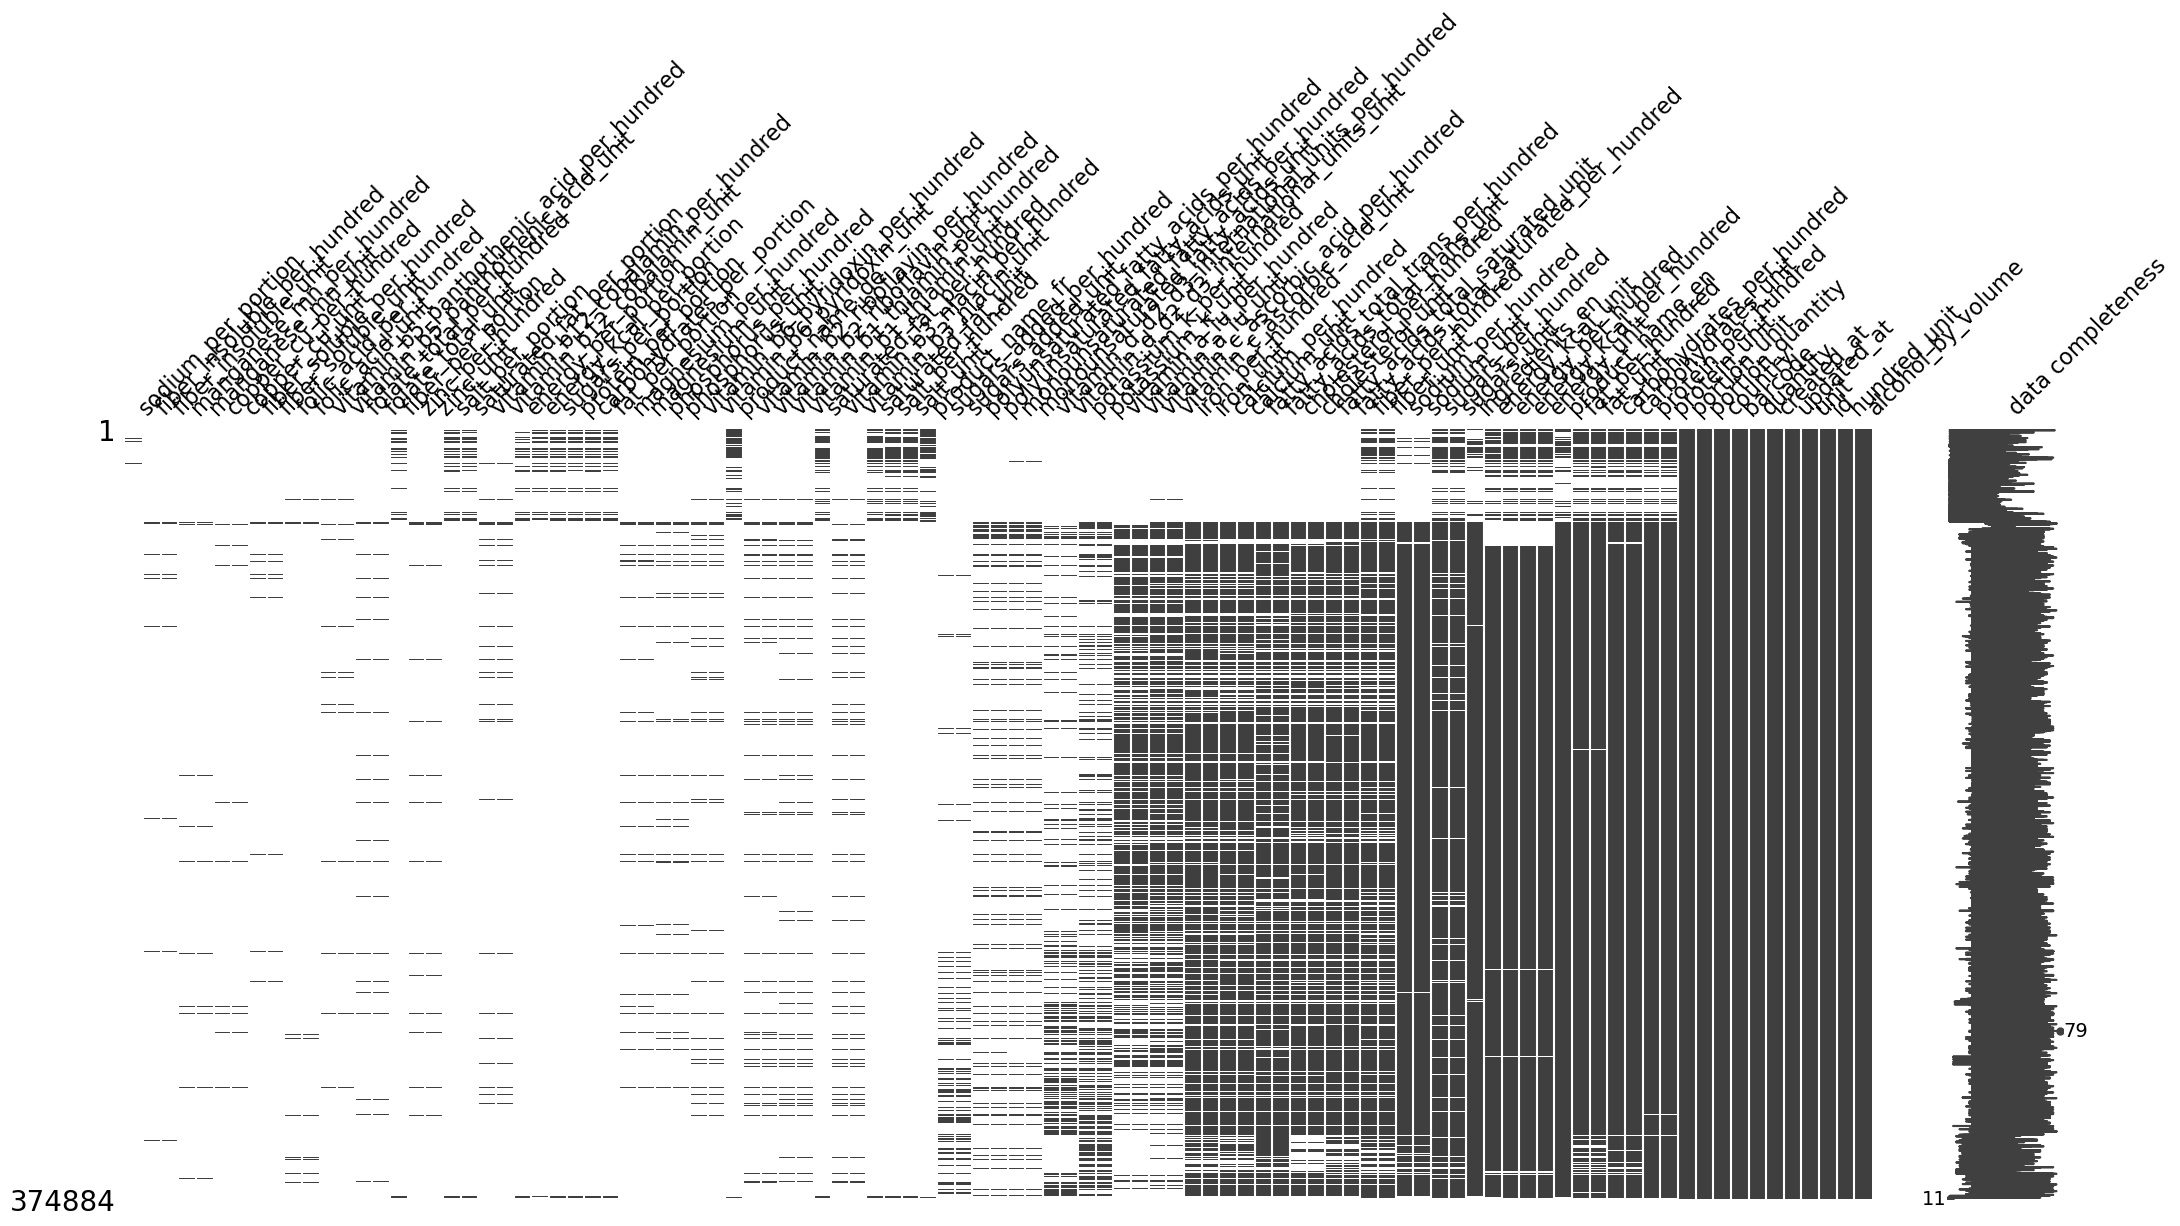

In [16]:
# Display the missing values in the data structure. In Advanced EDA - Part 2
missing = df.isnull().sum()
sort_missing = missing.sort_values(ascending =False).index
df_sort =df[sort_missing]
msno.matrix(df_sort, labels=True)

##### c) Create 3 lists that hold per_hundred, per_portion and _unit columns. Put the remaining column names in a 4th list named other columns. Note that you should create these 4 lists without manually selecting the column names. Next, create 4 line plots or bar charts that show the percentages of missing values in each list. (In addition, you can also use missingno on these 4 reduced data frames)

**Remarks and comments:** To answer this question, I used the groups created earlier in answer A.5, namely the per_hundred, per_portion, unit_ and other_ groups, with respective counts of 37, 10, 40 and 13 columns each. First, I calculated the percentage of missing values for each group and plotted them on a bar chart. However, due to the large number of columns in some groups, i.e. group unit_, the visual exploration of the graph was challenging. Therefore, I created tables for each group, where I identified columns with significant amounts of missing data, specifically those with a missing percentage greater than or equal to 95%, to be coherent and informative to the exercise below and following exercices. 

In [17]:
# Percentage of missing values in each of the data groups
perc_missing_per_hundred = [df[col].isnull().sum()/len(df)*100 for col in per_hundred_columns]
perc_missing_per_portion = [df[col].isnull().sum()/len(df)*100 for col in per_portion_columns]
perc_missing_unit = [df[col].isnull().sum()/len(df)*100 for col in unit_columns]
perc_missing_other = [df[col].isnull().sum()/len(df)*100 for col in other_columns]

C:\Users\arayadah\AppData\Local\Temp\ipykernel_25012\3195583122.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cols, rotation=90)


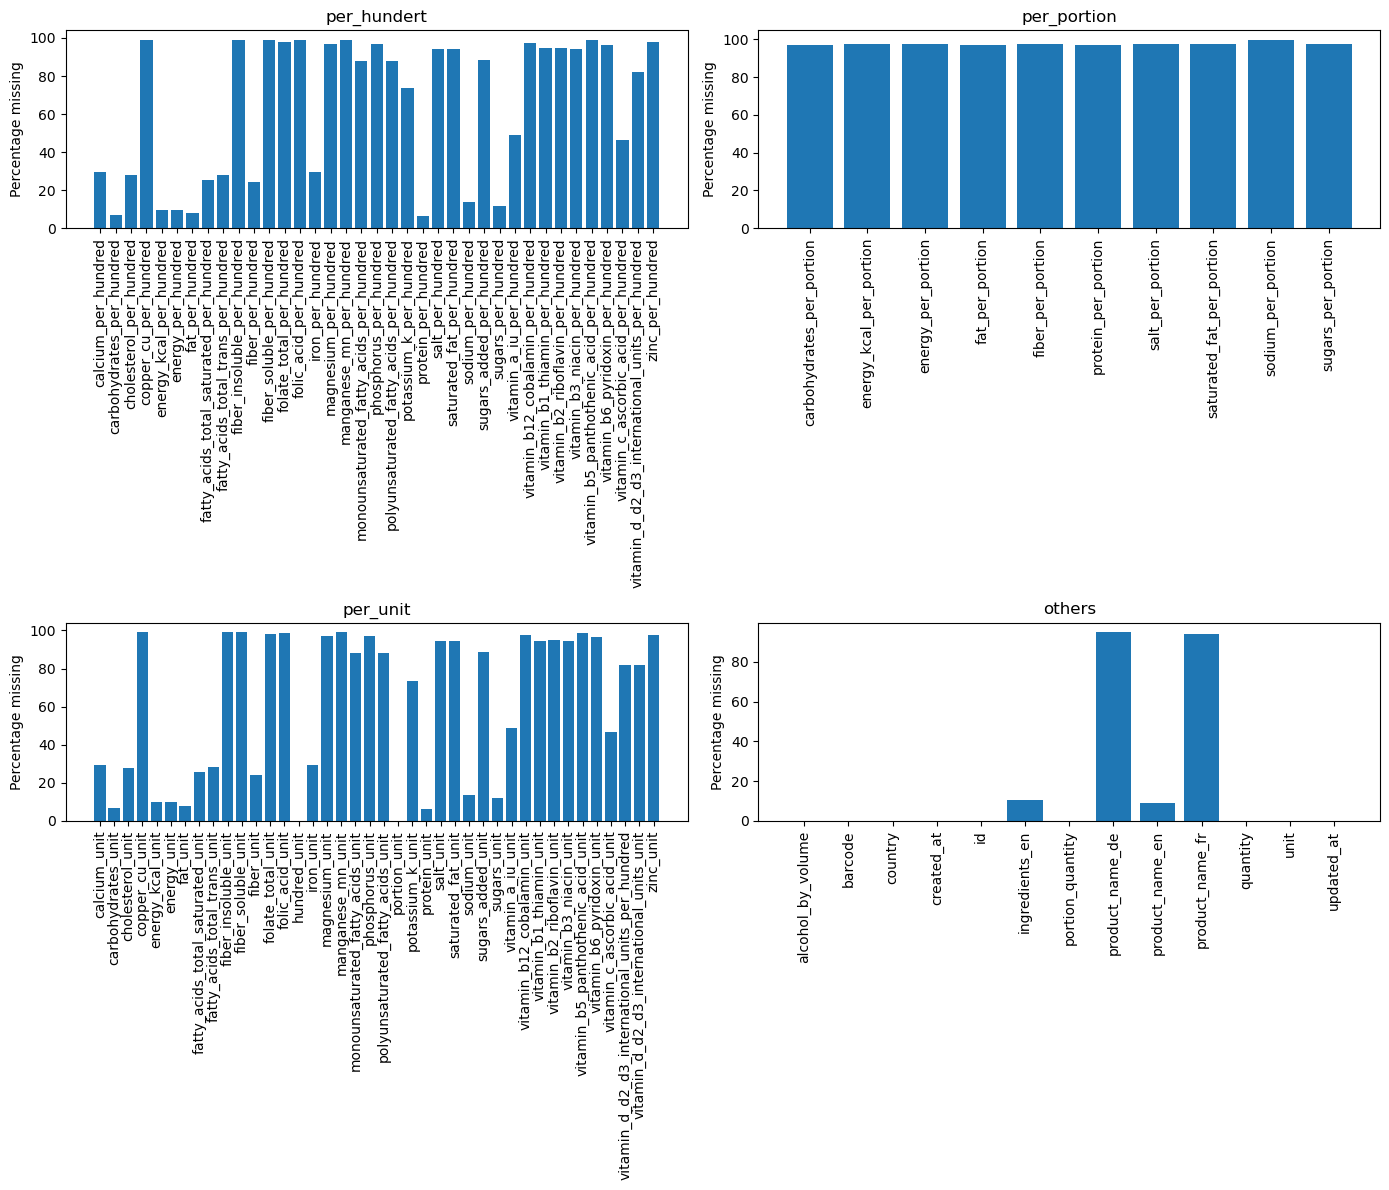

In [18]:
# Import matplotlib
import matplotlib.pyplot as plt

# Title of the plot, axes and labels 
def bar_chart(cols, perc_missing, title, ax):
    ax.bar(cols, perc_missing)
    ax.set_xticklabels(cols, rotation=90)
    ax.set_ylabel("Percentage missing")
    ax.set_title(title) 
    
# Properties    
fig, axs= plt.subplots(2,2,figsize=(14,12))

# Bar plots
bar_chart(per_hundred_columns, perc_missing_per_hundred, "per_hundert", axs[0,0])
bar_chart(per_portion_columns, perc_missing_per_portion, "per_portion", axs[0,1])
bar_chart(unit_columns, perc_missing_unit, "per_unit", axs[1,0])
bar_chart(other_columns, perc_missing_other, "others", axs[1,1])

plt.tight_layout()
plt.show()

In [19]:
# Table with the percentage of missing data in the category "per_hundred"
perc_missi_per_hundred = [(col, df[col].isnull().sum()/len(df)*100) for col in per_hundred_columns]
perc_missi_per_hundred = pd.DataFrame(perc_missi_per_hundred, columns=["Per_hundert_columns", "Percentage_missing"])
perc_missi_per_hundred = perc_missi_per_hundred[perc_missi_per_hundred["Percentage_missing"]>95]
perc_missi_per_hundred.sort_values(by="Percentage_missing", ascending=False)

Per_hundert_columns  Percentage_missing
9                fiber_insoluble_per_hundred           99.063977
16                  manganese_mn_per_hundred           99.057308
3                      copper_cu_per_hundred           99.036769
11                 fiber_soluble_per_hundred           98.979151
13                    folic_acid_per_hundred           98.811366
32  vitamin_b5_panthothenic_acid_per_hundred           98.788692
12                  folate_total_per_hundred           97.947098
36                          zinc_per_hundred           97.728631
28         vitamin_b12_cobalamin_per_hundred           97.399462
15                     magnesium_per_hundred           97.064425
18                    phosphorus_per_hundred           96.973197
33          vitamin_b6_pyridoxin_per_hundred           96.468508

In [20]:
# Table with the percentage of missing data in the category "per_portion"
perc_missing_per_portion2 = [(col, df[col].isnull().sum()/len(df)*100) for col in per_portion_columns]
perc_missing_per_portion2 = pd.DataFrame(perc_missing_per_portion2, columns=["Per_portion_columns", "Percentage_missing"])
perc_missing_per_portion2 = perc_missing_per_portion2[perc_missing_per_portion2["Percentage_missing"]>95]
perc_missing_per_portion2.sort_values(by="Percentage_missing", ascending=False)

Per_portion_columns  Percentage_missing
8         sodium_per_portion           99.799138
4          fiber_per_portion           97.818792
6           salt_per_portion           97.408798
7  saturated_fat_per_portion           97.404797
2         energy_per_portion           97.387192
1    energy_kcal_per_portion           97.341311
9         sugars_per_portion           97.300498
5        protein_per_portion           97.258885
0  carbohydrates_per_portion           97.237812
3            fat_per_portion           97.224208

In [21]:
# Table with the percentage of missing data in the category "_unit"
perc_missing_unit2 = [(col, df[col].isnull().sum()/len(df)*100) for col in unit_columns]
perc_missing_unit2 = pd.DataFrame(perc_missing_unit2, columns=["Units_columns", "Percentage_missing"])
perc_missing_unit2 = perc_missing_unit2[perc_missing_unit2["Percentage_missing"]>95]
perc_missing_unit2.sort_values(by="Percentage_missing", ascending=False)

Units_columns  Percentage_missing
9                fiber_insoluble_unit           99.063710
17                  manganese_mn_unit           99.056508
3                      copper_cu_unit           99.036769
10                 fiber_soluble_unit           98.978617
13                    folic_acid_unit           98.806297
34  vitamin_b5_panthothenic_acid_unit           98.783890
12                  folate_total_unit           97.947098
39                          zinc_unit           97.723829
30         vitamin_b12_cobalamin_unit           97.391993
16                     magnesium_unit           97.050554
19                    phosphorus_unit           96.971863
35          vitamin_b6_pyridoxin_unit           96.461572

In [22]:
# Table with the percentage of missing data in the category "_other"
perc_missing_other2 = [(col, df[col].isnull().sum()/len(df)*100) for col in other_columns]
perc_missing_other2 = pd.DataFrame(perc_missing_other2, columns=["Other_columns", "Percentage_missing"])
perc_missing_other2 = perc_missing_other2[perc_missing_other2["Percentage_missing"]>95]
perc_missing_other2.sort_values(by="Percentage_missing", ascending=False)

Empty DataFrame
Columns: [Other_columns, Percentage_missing]
Index: []

### 3. Now that you know the extent of missing values in the data, it is time to address them. Your goal is to keep as much data as possible in your data frame. At each step report how many samples and features remain.


##### a) As a first step, remove rows and columns that are completely empty (if there is any).

**Remarks and comments:** As already observed in the previous exercise there are no completely empty rows or columns.

In [23]:
# Remove all the empty rows
df.dropna(how="all", inplace=True)
print("Data Frame after removing empty rows:", df.shape)

Data Frame after removing empty rows: (374884, 99)


In [24]:
#Remove all the empty columns
df.dropna(how="all", axis=1, inplace=True)
print("Data Frame after removing empty columns:", df.shape)

Data Frame after removing empty columns: (374884, 99)


##### b) Start with your list of _unit columns, and check some of them and show what information they hold. One simple approach to fill up missing values in categorical columns is to use the most frequent value as a proxy for the missing value. Apply this approach to the _unit columns.

**Remarks and comments:** Based on the details provided in response A.5 concerning the columns labelled with "unit_" in their names, I have noted the existence of 40 such columns in the database. Additionally, response 2.C reveals that out of these 40 columns, 31 have missing values of more than 20%. All 40 columns, which contain categorical data, were populated using the *"mode"* method, which capture the most frequent value. After the update none of the columns related to units have rows with NA. 

In [25]:
# Display of the data of the "unit_" columns
unit_columns_to_fill = df.loc[:, unit_columns]
unit_columns_to_fill.head(3)

calcium_unit carbohydrates_unit cholesterol_unit copper_cu_unit  \
0          NaN                  g              NaN            NaN   
1          NaN                  g              NaN            NaN   
2          NaN                  g              NaN            NaN   

  energy_kcal_unit energy_unit fat_unit fatty_acids_total_saturated_unit  \
0             kCal          kJ        g                              NaN   
1             kCal          kJ        g                              NaN   
2             kCal          kJ        g                              NaN   

  fatty_acids_total_trans_unit fiber_insoluble_unit  ...  \
0                          NaN                  NaN  ...   
1                          NaN                  NaN  ...   
2                          NaN                  NaN  ...   

  vitamin_b12_cobalamin_unit vitamin_b1_thiamin_unit  \
0                        NaN                     NaN   
1                        NaN                     NaN   
2                        NaN                     NaN   

  vitamin_b2_riboflavin_unit vitamin_b3_niacin_unit  \
0                        NaN                    NaN   
1                        NaN                    NaN   
2                        NaN                    NaN   

  vitamin_b5_panthothenic_acid_unit vitamin_b6_pyridoxin_unit  \
0                               NaN                       NaN   
1                               NaN                       NaN   
2                               NaN                       NaN   

  vitamin_c_ascorbic_acid_unit  \
0                          NaN   
1                          NaN   
2                          NaN   

  vitamin_d_d2_d3_international_units_per_hundred  \
0                                             NaN   
1                                             NaN   
2                                             NaN   

  vitamin_d_d2_d3_international_units_unit zinc_unit  
0                                      NaN       NaN  
1                                      NaN       NaN  
2                                      NaN       NaN  

[3 rows x 40 columns]

In [26]:
# Fill the missing data with the most frequent value using the mode 
for col in unit_columns:
    most_frecuent_value = df[col].mode()[0]
    df[col]=df[col].fillna(most_frecuent_value)

In [27]:
# Table with the percentage of missing data in the category "_unit"
perc_missing_unit3 = [(col, df[col].isnull().sum()/len(df)*100) for col in unit_columns]
# Report how the df changed
count_perc_missing_unit3 = len([percentage for col, percentage in perc_missing_unit3 if percentage >0])
print("Number of columns labelled with _unit with missing values:", count_perc_missing_unit3)

Number of columns labelled with _unit with missing values: 0


In [28]:
print("Remaining shape of the dataFrame:", df.shape)

Remaining shape of the dataFrame: (374884, 99)


##### c) As a second strategy, let’s fill up the missing values of a column using other columns that hold similar information. Apply this approach to the product_name_en column. Find columns that hold similar information and use them to replace the missing value in product_name_en. Report the number of rows that you managed to fill up.

**Remarks and comments:** I have constructed this answer based on what I learned in answers 2a and 2c, where the tables produced allowed me to identify product names in other languages such as French and German. About 9% of the rows in the name column are missing values (NA). Using the French and German name values, it is possible to update and reduce this value to 5%.

When reviewing the series of exercises, I adapted my answers to the presented needs to develop the following exercises. Therefore, I decided to eliminate the rows that I could not fill in, as they only represent 5% of the data. As shown in the descriptive statistics below, this removal does not have an impact on different results. To develop the exercises in section G, a column without NA was required. I could have deleted these rows for this exercise only, as I did initially. However, the deletion of these rows has no significant effect on the results of other exercises. I made this decision based on running the rest of the exercises with and without the deletion of these rows.

In [29]:
# Visual exploration of this data
df["product_name_en"].head(3)

0                                Bio Spaghetti 
1                         Naturaplan Mozzarella
2    Caffè Mauro - Roasted organic coffee blend
Name: product_name_en, dtype: object

In [30]:
# Calculate number and percentage of missing values like in ejercise 2.a
missing_product_names = df["product_name_en"].isnull().sum()
perc_missing_product_names = round((missing_product_names/len(df["product_name_en"]))*100,1)
print("Number an percentage of missing values in product names column:", missing_product_names, ",",perc_missing_product_names,"%")

Number an percentage of missing values in product names column: 33165 , 8.8 %


In [31]:
# Select columns on the data with similar name to product_name_en
product_name_columns= df.loc[:, df.columns.str.contains("product_name")].columns.tolist()
product_name_columns

['product_name_de', 'product_name_en', 'product_name_fr']

In [32]:
#  Replace the name of the products by the names stored in the column product_name_de
df["product_name_en"]= df["product_name_en"].fillna(df["product_name_de"])
product_name_en_de = df["product_name_en"].isnull().sum()
product_name_en_de

23689

In [33]:
#  Replace the name of the products by the names stored in the column product_name_de
df["product_name_en"]= df["product_name_en"].fillna(df["product_name_fr"])
product_name_en_fr = df["product_name_en"].isnull().sum()
product_name_en_fr

18866

In [34]:
# Recalculate number and percentage of missing values like in ejercise 2.a
missing_product_names = df["product_name_en"].isnull().sum()
perc_missing_product_names = round((missing_product_names/len(df["product_name_en"]))*100,1)
print("Number an percentage of missing values in product names column:", missing_product_names, ",",perc_missing_product_names,"%")

Number an percentage of missing values in product names column: 18866 , 5.0 %


In [35]:
df.describe().round(2)

alcohol_by_volume  calcium_per_hundred  carbohydrates_per_hundred  \
count          374884.00            264854.00                  348551.00   
mean                0.03               116.65                      34.01   
std                 0.77              2557.91                      40.85   
min                 0.00                 0.00                       0.00   
25%                 0.00                 0.00                       6.67   
50%                 0.00                36.00                      23.53   
75%                 0.00               102.00                      60.00   
max                57.90            684000.00                    6400.00   

       carbohydrates_per_portion  cholesterol_per_hundred  \
count                   10355.00                270282.00   
mean                       19.28                    58.98   
std                        18.40                  1934.72   
min                         0.00                     0.00   
25%                         7.00                     0.00   
50%                        15.60                     0.00   
75%                        25.00                    25.00   
max                       150.50                250000.00   

       copper_cu_per_hundred  energy_kcal_per_hundred  \
count                3611.00                338574.00   
mean                    5.47                   272.48   
std                   274.47                   258.29   
min                     0.00                     0.00   
25%                     0.21                    89.00   
50%                     0.48                   267.00   
75%                     1.07                   400.00   
max                 16483.52                 39600.00   

       energy_kcal_per_portion  energy_per_hundred  energy_per_portion  ...  \
count                  9967.00           338571.00             9795.00  ...   
mean                    159.08             1139.51              658.35  ...   
std                     139.15             1079.68              570.59  ...   
min                       0.00                0.00                0.00  ...   
25%                      78.00              372.38              322.50  ...   
50%                     127.00             1117.13              530.00  ...   
75%                     194.00             1673.60              805.00  ...   
max                    1508.00           165686.40             5212.00  ...   

       vitamin_a_iu_per_hundred  vitamin_b12_cobalamin_per_hundred  \
count                 192093.00                            9749.00   
mean                     494.24                              17.46   
std                     2445.25                             405.52   
min                        0.00                               0.00   
25%                        0.00                               0.42   
50%                        0.00                               1.62   
75%                      352.00                               4.20   
max                   333333.00                           33898.31   

       vitamin_b1_thiamin_per_hundred  vitamin_b2_riboflavin_per_hundred  \
count                        20402.00                           19683.00   
mean                             0.93                               1.68   
std                             13.49                             142.61   
min                              0.00                               0.00   
25%                              0.00                               0.20   
50%                              0.00                               0.33   
75%                              1.00                               0.59   
max                           1111.00                           20000.00   

       vitamin_b3_niacin_per_hundred  \
count                       21117.00   
mean                            9.85   
std                            73.08   
min                             0.00   
25%                           

In [36]:
df = df.dropna(subset=["product_name_en"])
df.describe().round(2)

alcohol_by_volume  calcium_per_hundred  carbohydrates_per_hundred  \
count          356018.00            264818.00                  345275.00   
mean                0.02               116.63                      34.03   
std                 0.72              2558.08                      40.96   
min                 0.00                 0.00                       0.00   
25%                 0.00                 0.00                       6.67   
50%                 0.00                36.00                      23.53   
75%                 0.00               102.00                      60.00   
max                57.90            684000.00                    6400.00   

       carbohydrates_per_portion  cholesterol_per_hundred  \
count                    9013.00                270277.00   
mean                       18.68                    58.98   
std                        17.24                  1934.74   
min                         0.00                     0.00   
25%                         7.00                     0.00   
50%                        15.50                     0.00   
75%                        25.00                    25.00   
max                       148.00                250000.00   

       copper_cu_per_hundred  energy_kcal_per_hundred  \
count                3611.00                335275.00   
mean                    5.47                   272.17   
std                   274.47                   258.85   
min                     0.00                     0.00   
25%                     0.21                    89.00   
50%                     0.48                   267.00   
75%                     1.07                   400.00   
max                 16483.52                 39600.00   

       energy_kcal_per_portion  energy_per_hundred  energy_per_portion  ...  \
count                  8701.00           335257.00             8448.00  ...   
mean                    155.59             1138.26              643.87  ...   
std                     131.17             1082.10              536.61  ...   
min                       0.00                0.00                0.00  ...   
25%                      78.00              372.38              324.00  ...   
50%                     126.00             1117.13              529.00  ...   
75%                     191.00             1673.60              794.00  ...   
max                    1508.00           165686.40             5212.00  ...   

       vitamin_a_iu_per_hundred  vitamin_b12_cobalamin_per_hundred  \
count                 192093.00                            9734.00   
mean                     494.24                              17.49   
std                     2445.25                             405.83   
min                        0.00                               0.00   
25%                        0.00                               0.41   
50%                        0.00                               1.62   
75%                      352.00                               4.21   
max                   333333.00                           33898.31   

       vitamin_b1_thiamin_per_hundred  vitamin_b2_riboflavin_per_hundred  \
count                        20382.00                           19667.00   
mean                             0.93                               1.68   
std                             13.50                             142.67   
min                              0.00                               0.00   
25%                              0.00                               0.20   
50%                              0.00                               0.33   
75%                              1.00                               0.59   
max                           1111.00                           20000.00   

       vitamin_b3_niacin_per_hundred  \
count                       21097.00   
mean                            9.85   
std                            73.11   
min                             0.00   
25%                           

In [37]:
print("Remaining shape of the dataFrame:", df.shape)

Remaining shape of the dataFrame: (356018, 99)


##### d) As a third strategy, let’s fi ll up missing values based on common knowledge. Take the column named iron_per_hundred which has about 30% missing values. One possible explanation for its missing values could bethat those products are iron-free (like ice cream). Based on this assumption address the missing values foriron_per_hundred.

**Remarks and comments:** I constructed this response based on response 2.a to identify the number and percentage of missing information in the iron per hundred column. According to the analysis, approximately 30% of the information in the iron_per_hundred column is missing. But becuase I delete the 5% of the missing values on the column name in the previous exercise B.3.c this value is reduced to around 26%. Based on my visual examination of the data, it was not possible to determine the type of products contained in the column. However, given the information provided in the exercise, I assumed that the missing values were due to the products not containing iron. Therefore, to fill in these missing values, I assigned a value of 0 iron, which can be done using the "fillna" method.

In [38]:
# Visual exploration of this data
df["iron_per_hundred"].head(3)

0   NaN
1   NaN
2   NaN
Name: iron_per_hundred, dtype: float64

In [39]:
# Calculate number and percentage of missing values like in ejercise 2.a
missing_iron_values = df["iron_per_hundred"].isnull().sum()
perc_missing_iron_values = round((missing_iron_values/len(df["iron_per_hundred"]))*100,1)
print("Number an percentage of missing values in iron per hundred column:", missing_iron_values, ",",perc_missing_iron_values,"%")

Number an percentage of missing values in iron per hundred column: 91649 , 25.7 %


In [40]:
# Fill the missing values with 0
df["iron_per_hundred"] = df["iron_per_hundred"].fillna(0)

In [41]:
# Report on the changed made
print("Number of missing values in iron per hundred column after filling with 0:", df["iron_per_hundred"].isnull().sum())

Number of missing values in iron per hundred column after filling with 0: 0


In [42]:
print("Remaining shape of the dataFrame:", df.shape)

Remaining shape of the dataFrame: (356018, 99)


##### e) Another strategy for text-based columns is to indicate that some of the fields are missing. For instance, the column ingredients_en has about 10% of missing values. Let’s replace them with the term ingredient_missing.

**Remarks and comments:** To deal with the missing values in the data, I used the same approach as in answer 3.c. According to the analysis, approximately 10% of the information in the ingredient_in column is missing. But becuase I delete the 5% of the missing values on the column name in the previous exercise B.3.c this value is reduced to around 6%. To solve this problem, I replaced the missing values with the string "Ingredient_missing" in the 38,958 rows where data was missing.

In [43]:
# Visual exploration of this data
df["ingredients_en"].head(3)

0    Superior quality durum wheat Pasta\r\n\r\nIngr...
1                 Bio Milk (Switzerland), kitchen salt
2                                 100%  coffee Arabica
Name: ingredients_en, dtype: object

In [44]:
# Calculate number and percentage of missing values like in ejercise 2.a
missing_ingredients_values = df["ingredients_en"].isnull().sum()
perc_missing_ingredients_values = round((missing_ingredients_values/len(df["ingredients_en"]))*100,1)
print("Number an percentage of missing values in ingredients column:", missing_ingredients_values, ",",perc_missing_ingredients_values,"%")

Number an percentage of missing values in ingredients column: 20303 , 5.7 %


In [45]:
# Fill the missing values with "Ingredient_missing"
df["ingredients_en"] = df["ingredients_en"].fillna("Ingredient_missing")

In [46]:
# Report on the changed made
print("Number of missing values in ingredients column after filling with Ingredient_missing:", df["ingredients_en"].isnull().sum())

Number of missing values in ingredients column after filling with Ingredient_missing: 0


In [47]:
print("Remaining shape of the dataFrame:", df.shape)

Remaining shape of the dataFrame: (356018, 99)


##### f) Finally, let’s assume that you want to build up your data analysis pipeline based on at least 20,000 rows of non-missing data. This amounts to about 5% of the data set. Your task is to drop the columns that have more than 95% of missing values. What is the shape of the remaining data?

**Remarks and comments:** To answer this question, I used a similar approach to the one I used in answering question 2.c. As a result, the data now has 77 columns instead of 99, while the number of rows remains unchanged. However, I noticed that many of the deleted columns were _per_hundred columns and had related _unit columns (e.g. fiber_insoluble_unit vs fiber_insoluble_per_hundred). Since the data from the deleted per_hundred columns are no longer in the dataFrame, I decided to delete the unit columns related to the already deleted data as well. Consequently, the data frame shape remains with 356018 rows and 65 columns. To visualise the changes made, I used the missingno library again.

In [48]:
# Shape of the DataFrame
print("Remaining shape of the dataFrame:", df.shape)

Remaining shape of the dataFrame: (356018, 99)


In [49]:
# Percentage of missing data per column
perc_missing = df.isnull().sum()/len(df)*100
list_perc_missing=perc_missing[perc_missing>95].index.tolist()
print(list_perc_missing)

['carbohydrates_per_portion', 'copper_cu_per_hundred', 'energy_kcal_per_portion', 'energy_per_portion', 'fat_per_portion', 'fiber_insoluble_per_hundred', 'fiber_per_portion', 'fiber_soluble_per_hundred', 'folate_total_per_hundred', 'folic_acid_per_hundred', 'magnesium_per_hundred', 'manganese_mn_per_hundred', 'phosphorus_per_hundred', 'protein_per_portion', 'salt_per_portion', 'saturated_fat_per_portion', 'sodium_per_portion', 'sugars_per_portion', 'vitamin_b12_cobalamin_per_hundred', 'vitamin_b5_panthothenic_acid_per_hundred', 'vitamin_b6_pyridoxin_per_hundred', 'zinc_per_hundred']


In [50]:
# Drop columns with more than 95% of missing values
df = df.loc[:,perc_missing<95]

# Drop columns with the units of the columns per hundred removed
df = df.drop(["copper_cu_unit", "fiber_insoluble_unit", "fiber_soluble_unit", "folate_total_unit", 
              "folic_acid_unit", "magnesium_unit", "manganese_mn_unit", "phosphorus_unit","vitamin_b12_cobalamin_unit", 
              "vitamin_b5_panthothenic_acid_unit", "vitamin_b6_pyridoxin_unit", "zinc_unit"], axis=1)

# Report the change in the df
print("Shape of the clean data", df.shape)

Shape of the clean data (356018, 65)


<AxesSubplot:>

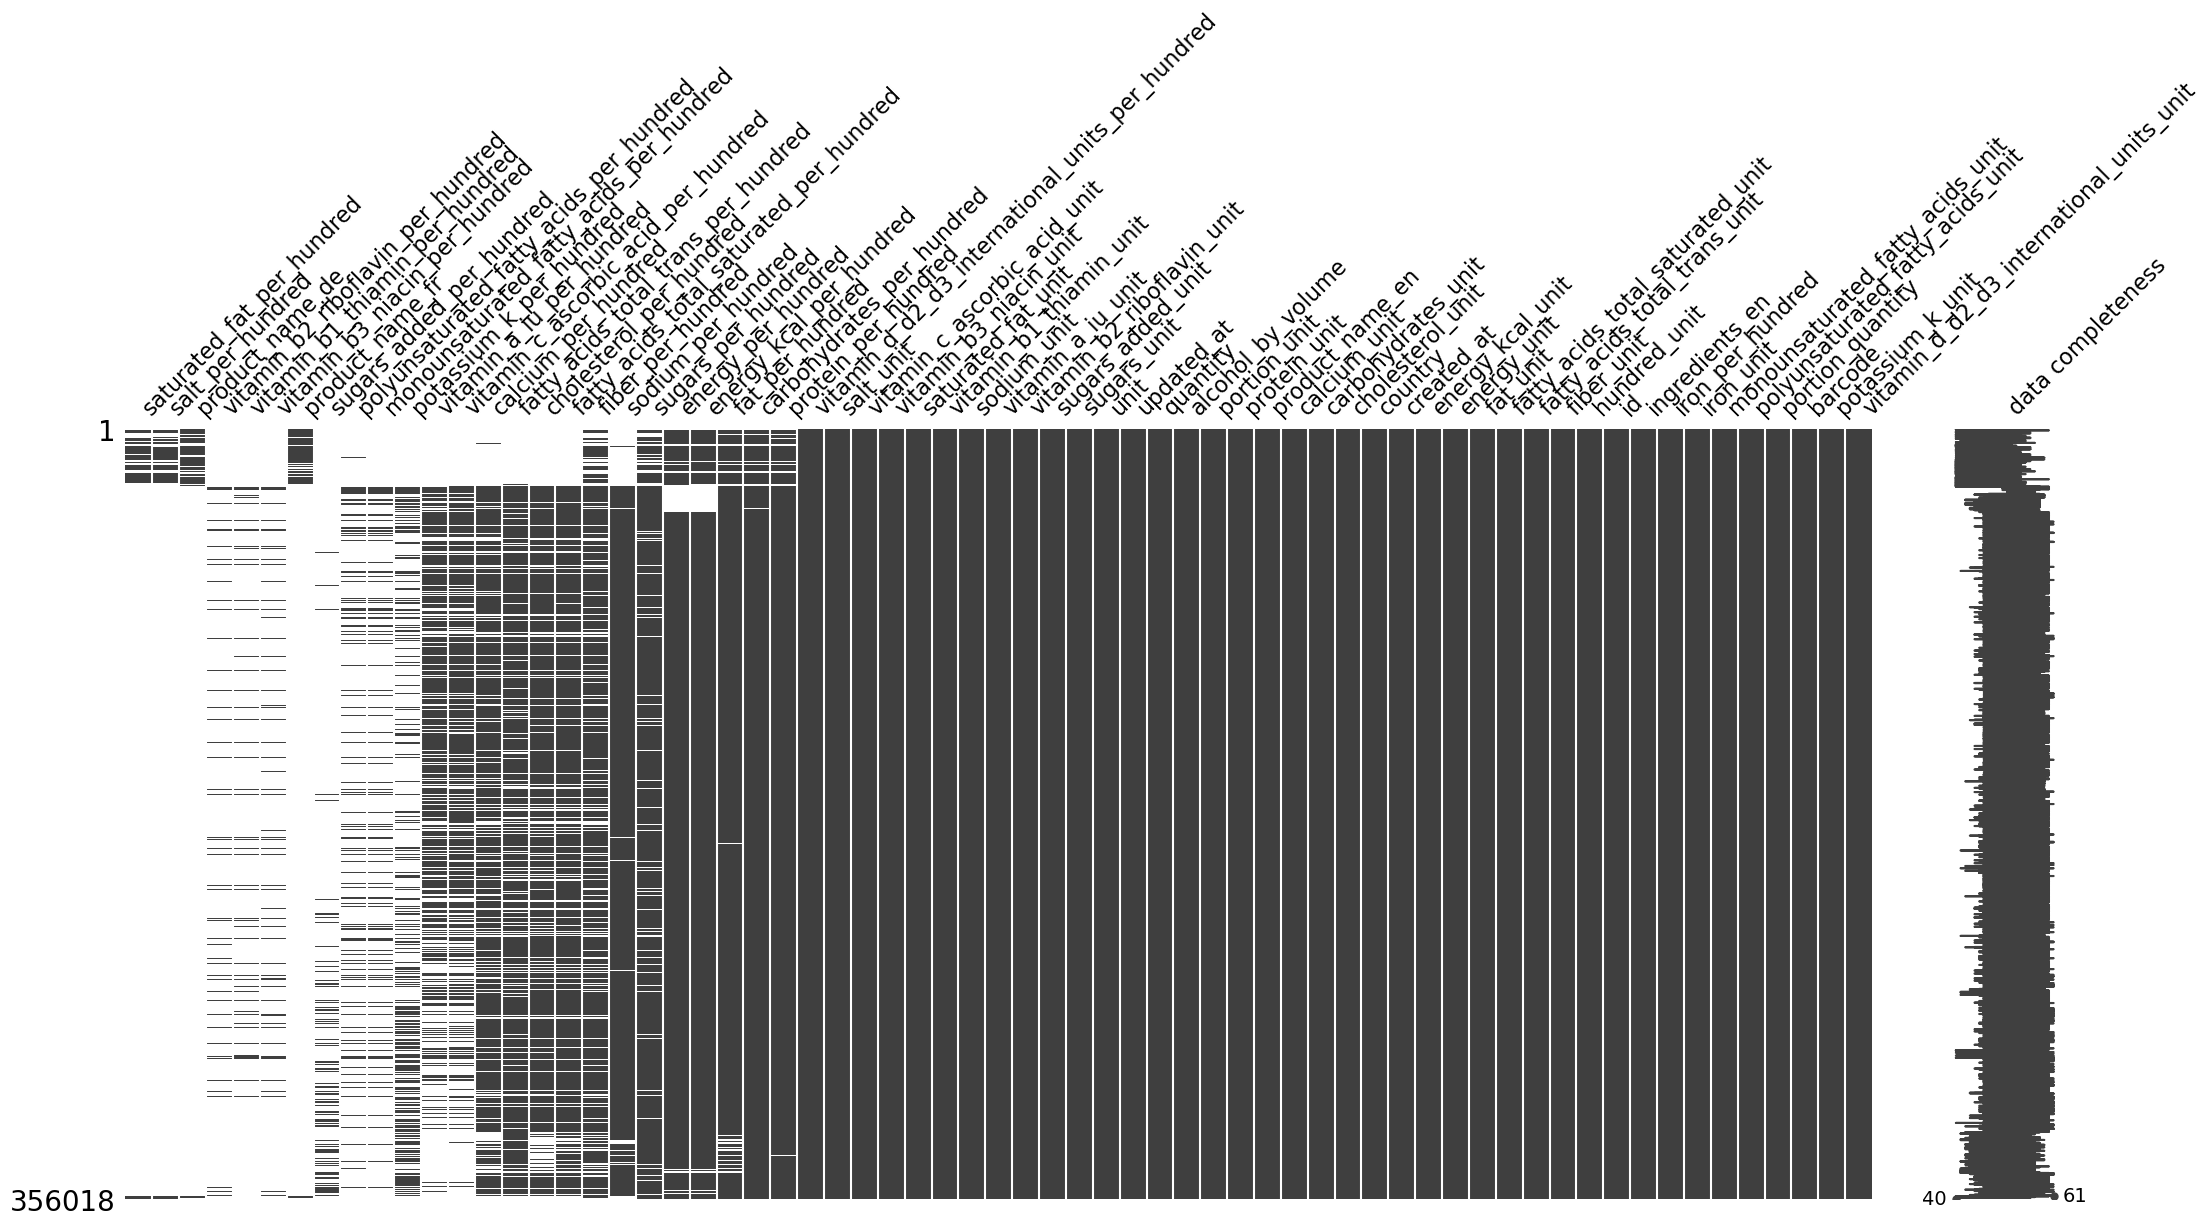

In [51]:
# Display the missing values in the data structure. In Advanced EDA - Part 2
missing = df.isnull().sum()
sort_missing = missing.sort_values(ascending =False).index
df_sort =df[sort_missing]
msno.matrix(df_sort, labels=True)

## C. Preliminary Exploratory Data Analysis (EDA)

### 1. Let’s start by exploring the categorical variables in more detail. What is the number of unique values in categorical variables? Show the proportion of samples in each categorical level in the variables country and unit using appropriate visualizations.

**Remarks and comments:** Based on answer A.4, I learned that the data types of the df are object, float64 and int64. Based on this knowedge I create a list and count of the categorical columns.Then I stimate the number of unique values in each categorical variable. I also, presented the proportion of samples in ach of the clases of the varibles country and unit. In the column "countries" contained only one country for the UK and AT data, which is not statistically significant for further analysis were removed. In total, 2 rows were removed from the original set of over 350000 rows.

In [52]:
# Identify the categorical variables in the df
categorical_columns = df.select_dtypes(include=["object"]).columns.tolist()
print("Number of categorical variables:", len(categorical_columns),"\nList of categorical variables:",categorical_columns)

Number of categorical variables: 36 
List of categorical variables: ['barcode', 'calcium_unit', 'carbohydrates_unit', 'cholesterol_unit', 'country', 'created_at', 'energy_kcal_unit', 'energy_unit', 'fat_unit', 'fatty_acids_total_saturated_unit', 'fatty_acids_total_trans_unit', 'fiber_unit', 'hundred_unit', 'ingredients_en', 'iron_unit', 'monounsaturated_fatty_acids_unit', 'polyunsaturated_fatty_acids_unit', 'portion_unit', 'potassium_k_unit', 'product_name_de', 'product_name_en', 'product_name_fr', 'protein_unit', 'salt_unit', 'saturated_fat_unit', 'sodium_unit', 'sugars_added_unit', 'sugars_unit', 'unit', 'updated_at', 'vitamin_a_iu_unit', 'vitamin_b1_thiamin_unit', 'vitamin_b2_riboflavin_unit', 'vitamin_b3_niacin_unit', 'vitamin_c_ascorbic_acid_unit', 'vitamin_d_d2_d3_international_units_unit']


In [53]:
# Number of unique values in the categorical data
for var in categorical_columns:
    unique = df[var].nunique()
    print(f"{var}:{unique} unique values")    

barcode:355869 unique values
calcium_unit:1 unique values
carbohydrates_unit:1 unique values
cholesterol_unit:1 unique values
country:7 unique values
created_at:28128 unique values
energy_kcal_unit:1 unique values
energy_unit:1 unique values
fat_unit:1 unique values
fatty_acids_total_saturated_unit:1 unique values
fatty_acids_total_trans_unit:1 unique values
fiber_unit:1 unique values
hundred_unit:3 unique values
ingredients_en:247067 unique values
iron_unit:1 unique values
monounsaturated_fatty_acids_unit:1 unique values
polyunsaturated_fatty_acids_unit:1 unique values
portion_unit:6 unique values
potassium_k_unit:1 unique values
product_name_de:18572 unique values
product_name_en:236650 unique values
product_name_fr:20983 unique values
protein_unit:1 unique values
salt_unit:1 unique values
saturated_fat_unit:1 unique values
sodium_unit:1 unique values
sugars_added_unit:1 unique values
sugars_unit:1 unique values
unit:9 unique values
updated_at:28149 unique values
vitamin_a_iu_unit:1 

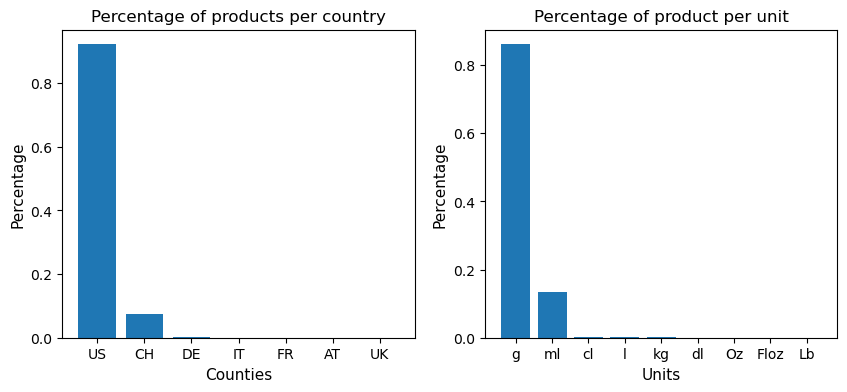

In [54]:
# Percentage of categories in the variables country and units
country_categories = df["country"].value_counts(normalize=True)
units_categories =df["unit"].value_counts(normalize=True)

# Properties
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize= (10,4))

# Country bar plot
ax1.bar(country_categories.index, country_categories.values)
ax1.set_title("Percentage of products per country", fontsize=12) # Title
ax1.set_xlabel("Counties", fontsize=11) # Title x axis
ax1.set_ylabel("Percentage", fontsize=11) # Title y axis

# Units bar plot
ax2.bar(units_categories.index, units_categories.values)
ax2.set_title("Percentage of product per unit", fontsize=12) # Title
ax2.set_xlabel("Units", fontsize=11) # Title x axis
ax2.set_ylabel("Percentage", fontsize=11) # Title y axis

plt.show()

In [55]:
df.shape

(356018, 65)

In [56]:
# Identify rows for UK in the column country
rows_UK = df[df["country"].str.contains("UK")]
pd.set_option("display.max_columns", None) # diplay the full rows
rows_UK.head()

alcohol_by_volume        barcode  calcium_per_hundred calcium_unit  \
41185                0.0  7610029180947                  NaN           mg   

       carbohydrates_per_hundred carbohydrates_unit  cholesterol_per_hundred  \
41185                        5.0                  g                      NaN   

      cholesterol_unit country                created_at  \
41185               mg      UK  2019-08-27T07:51:32.691Z   

       energy_kcal_per_hundred energy_kcal_unit  energy_per_hundred  \
41185                     56.0             kCal               230.0   

      energy_unit  fat_per_hundred fat_unit  \
41185          kJ              2.5        g   

       fatty_acids_total_saturated_per_hundred  \
41185                                      NaN   

      fatty_acids_total_saturated_unit  fatty_acids_total_trans_per_hundred  \
41185                                g                                  NaN   

      fatty_acids_total_trans_unit  fiber_per_hundred fiber_unit hundred_unit  \
41185                            g                0.0          g           ml   

          id      ingredients_en  iron_per_hundred iron_unit  \
41185  42655  Ingredient_missing               0.0        mg   

       monounsaturated_fatty_acids_per_hundred  \
41185                                      NaN   

      monounsaturated_fatty_acids_unit  \
41185                                g   

       polyunsaturated_fatty_acids_per_hundred  \
41185                                      NaN   

      polyunsaturated_fatty_acids_unit  portion_quantity portion_unit  \
41185                                g             250.0           ml   

       potassium_k_per_hundred potassium_k_unit  \
41185                      NaN               mg   

                          product_name_de                     product_name_en  \
41185  DENNER Wiesenmilch Milchdrink 2,5%  DENNER Wiesenmilch Milchdrink 2,5%   

                            product_name_fr  protein_per_hundred protein_unit  \
41185  DENNER Lait des prés lait drink 2,5%                  3.0            g   

       quantity  salt_per_hundred salt_unit  saturated_fat_per_hundred  \
41185    1000.0               0.1         g                        1.5   

      saturated_fat_unit  sodium_per_hundred sodium_unit  \
41185                  g                 NaN           g   

       sugars_added_per_hundred sugars_added_unit  sugars_per_hundred  \
41185                       NaN                 g                 5.0   

      sugars_unit unit                updated_at  vitamin_a_iu_per_hundred  \
41185           g   ml  2019-08-27T08:24:18.442Z                       NaN   

      vitamin_a_iu_unit  vitamin_b1_thiamin_per_hundred  \
41185                IU                             NaN   

      vitamin_b1_thiamin_unit  vitamin_b2_riboflavin_per_hundred  \
41185                      mg                                NaN   

      vitamin_b2_riboflavin_unit  vitamin_b3_niacin_per_hundred  \
41185                         mg                            NaN   

      vitamin_b3_niacin_unit  vitamin_c_ascorbic_acid_per_hundred  \
41185                     mg                                  NaN   

      vitamin_c_ascorbic_acid_unit  \
41185                           mg   

       vitamin_d_d2_d3_international_units_per_hundred  \
41185                                              0.0   

      vitamin_d_d2_d3_international_units_unit  
41185                                       IU

In [57]:
# Drop rows with UK
df.drop(rows_UK.index, inplace=True)
print(df.shape)

(356017, 65)


In [58]:
# Identify rows for AT in the column country
rows_AT = df[df["country"].str.contains("AT")]
pd.set_option("display.max_columns", None) # diplay the full rows
rows_AT.head()

alcohol_by_volume   barcode  calcium_per_hundred calcium_unit  \
35664                0.0  90288050                  NaN           mg   

       carbohydrates_per_hundred carbohydrates_unit  cholesterol_per_hundred  \
35664                        NaN                  g                      NaN   

      cholesterol_unit country                created_at  \
35664               mg      AT  2018-10-12T07:44:19.007Z   

       energy_kcal_per_hundred energy_kcal_unit  energy_per_hundred  \
35664                     43.0             kCal               179.0   

      energy_unit  fat_per_hundred fat_unit  \
35664          kJ              NaN        g   

       fatty_acids_total_saturated_per_hundred  \
35664                                      NaN   

      fatty_acids_total_saturated_unit  fatty_acids_total_trans_per_hundred  \
35664                                g                                  NaN   

      fatty_acids_total_trans_unit  fiber_per_hundred fiber_unit hundred_unit  \
35664                            g                NaN          g           ml   

          id      ingredients_en  iron_per_hundred iron_unit  \
35664  37052  Ingredient_missing               0.0        mg   

       monounsaturated_fatty_acids_per_hundred  \
35664                                      NaN   

      monounsaturated_fatty_acids_unit  \
35664                                g   

       polyunsaturated_fatty_acids_per_hundred  \
35664                                      NaN   

      polyunsaturated_fatty_acids_unit  portion_quantity portion_unit  \
35664                                g               0.0            g   

       potassium_k_per_hundred potassium_k_unit product_name_de  \
35664                      NaN               mg   Gösser Märzen   

      product_name_en product_name_fr  protein_per_hundred protein_unit  \
35664   Gösser Märzen             NaN                  NaN            g   

       quantity  salt_per_hundred salt_unit  saturated_fat_per_hundred  \
35664     330.0               NaN         g                        NaN   

      saturated_fat_unit  sodium_per_hundred sodium_unit  \
35664                  g                 NaN           g   

       sugars_added_per_hundred sugars_added_unit  sugars_per_hundred  \
35664                       NaN                 g                 NaN   

      sugars_unit unit                updated_at  vitamin_a_iu_per_hundred  \
35664           g   ml  2018-10-12T07:46:17.880Z                       NaN   

      vitamin_a_iu_unit  vitamin_b1_thiamin_per_hundred  \
35664                IU                             NaN   

      vitamin_b1_thiamin_unit  vitamin_b2_riboflavin_per_hundred  \
35664                      mg                                NaN   

      vitamin_b2_riboflavin_unit  vitamin_b3_niacin_per_hundred  \
35664                         mg                            NaN   

      vitamin_b3_niacin_unit  vitamin_c_ascorbic_acid_per_hundred  \
35664                     mg                                  NaN   

      vitamin_c_ascorbic_acid_unit  \
35664                           mg   

       vitamin_d_d2_d3_international_units_per_hundred  \
35664                                              0.0   

      vitamin_d_d2_d3_international_units_unit  
35664                                       IU

In [59]:
# Drop rows with AT
df.drop(rows_AT.index, inplace=True)
print("Remaining shape of the dataFrame:", df.shape)

Remaining shape of the dataFrame: (356016, 65)


### 2. Provide descriptive statistics (e.g., min/max/mean) and informative plots (e.g.,histograms) of the numerical variables. You should obtain these plots as subplots.

**Remarks and comments:** I answer this question using what I learned in Chapter 04 of EDA Advanced - Part 3, which presents how to plot histograms of numerical variables.

In [60]:
# Identify the categorical variables in the df
numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
numerical_columns_stat = df[numerical_columns].describe()
numerical_columns_stat

alcohol_by_volume  calcium_per_hundred  carbohydrates_per_hundred  \
count      356016.000000        264818.000000              345274.000000   
mean            0.023564           116.627281                  34.034551   
std             0.719014          2558.081719                  40.959203   
min             0.000000             0.000000                   0.000000   
25%             0.000000             0.000000                   6.670000   
50%             0.000000            36.000000                  23.530000   
75%             0.000000           102.000000                  60.000000   
max            57.900000        684000.000000                6400.000000   

       cholesterol_per_hundred  energy_kcal_per_hundred  energy_per_hundred  \
count            270277.000000            335273.000000       335255.000000   
mean                 58.982449               272.176228         1138.263348   
std                1934.736852               258.845581         1082.097479   
min                   0.000000                 0.000000            0.000000   
25%                   0.000000                89.000000          372.380000   
50%                   0.000000               267.000000         1117.130000   
75%                  25.000000               400.000000         1673.600000   
max              250000.000000             39600.000000       165686.400000   

       fat_per_hundred  fatty_acids_total_saturated_per_hundred  \
count    341984.000000                            279151.000000   
mean         12.671625                                 4.943331   
std          19.519465                                 8.500435   
min           0.000000                                 0.000000   
25%           0.000000                                 0.000000   
50%           5.360000                                 2.000000   
75%          20.000000                                 7.140000   
max        3200.000000                              1000.000000   

       fatty_acids_total_trans_per_hundred  fiber_per_hundred             id  \
count                        269607.000000      282872.000000  356016.000000   
mean                              0.034861           2.926918  197270.181259   
std                               1.285369           5.903113  104551.464249   
min                               0.000000           0.000000     971.000000   
25%                               0.000000           0.000000  109282.750000   
50%                               0.000000           1.600000  198290.500000   
75%                               0.000000           3.600000  287307.250000   
max                             615.380000        1730.000000  376941.000000   

       iron_per_hundred  monounsaturated_fatty_acids_per_hundred  \
count     356016.000000                             44512.000000   
mean           5.659394                                 8.374079   
std         1362.500390                                14.441727   
min            0.000000                                 0.000000   
25%            0.000000                                 0.000000   
50%            0.295000                                 3.230000   
75%            1.790000                                 8.930000   
max       769230.770000                               200.000000   

       polyunsaturated_fatty_acids_per_hundred  portion_quantity  \
count                             44419.000000     356016.000000   
mean                                  5.390748          3.368156   
std                                   9.457140         29.404134   
min                                   0.000000          0.000000   
25%                                   0.000000          0.000000   
50%                                   1.880000          0.000000   
75%                                   6.505000          0.000000   
max                                 100.000000       3000.000000   

       potassium_k_per_hundred  protein_per_hundred       q

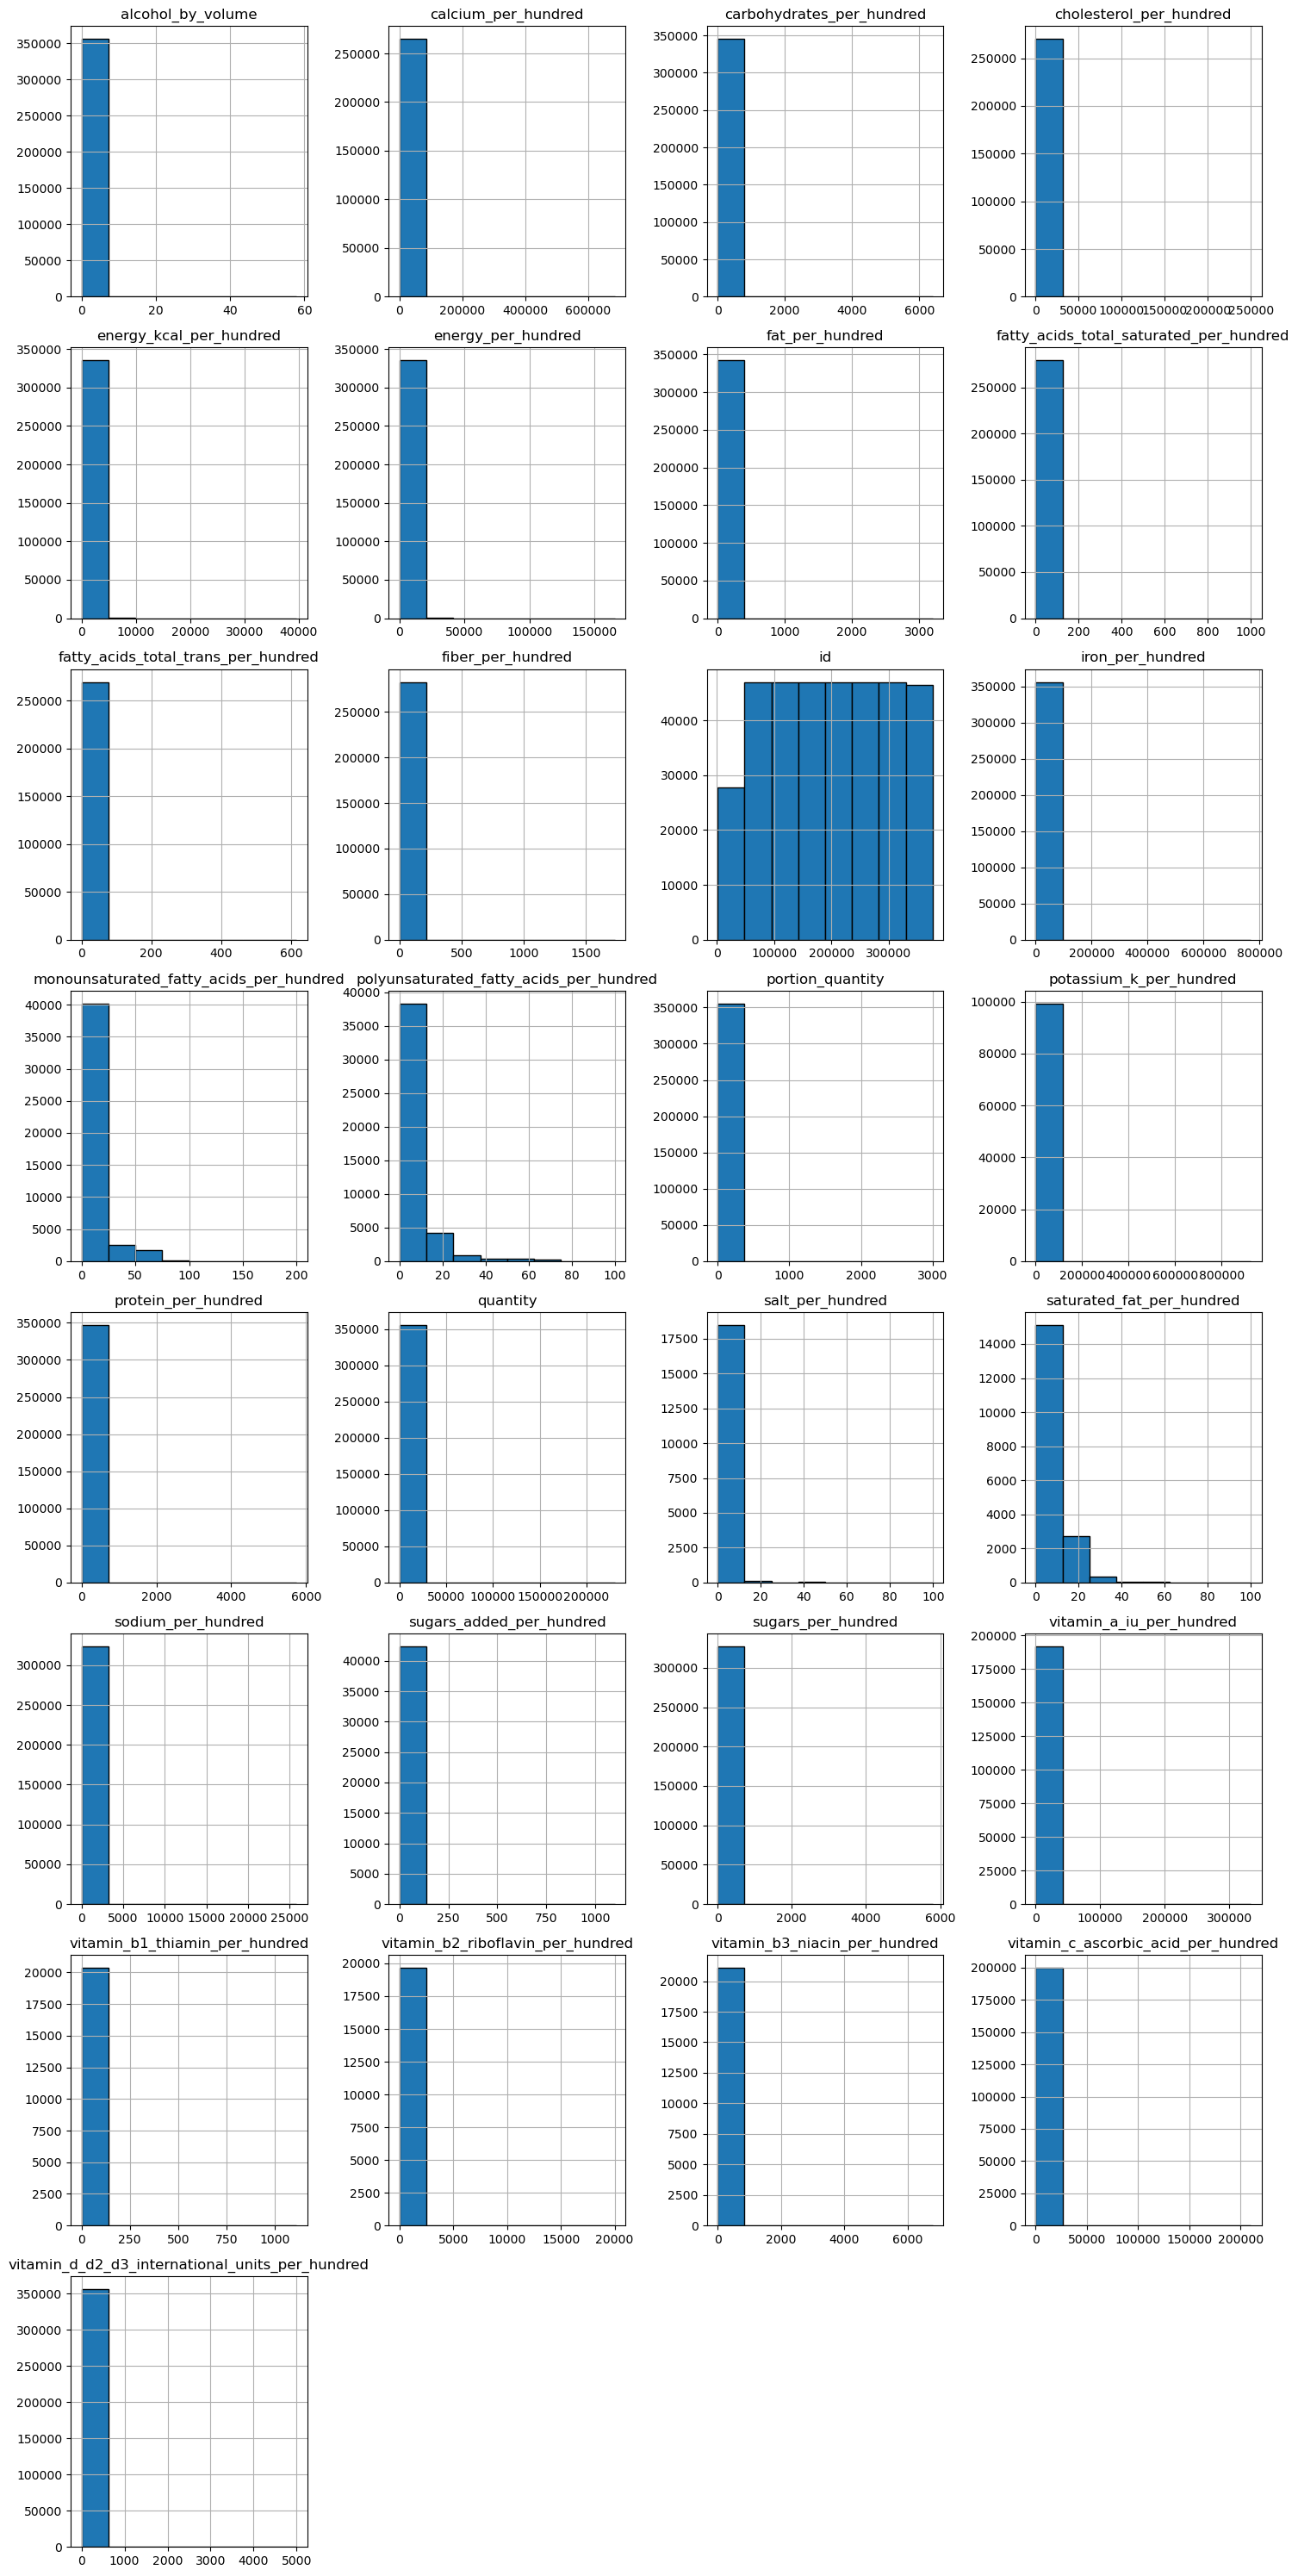

In [61]:
# Create numerical dataFrame
numerical_df = df[numerical_columns]

# Histogram for each numerical variable as a subplot
numerical_df.hist(bins=8, figsize=(15, 30), layout=(-1, 4), edgecolor="black")
plt.tight_layout()

### 3. Errors and unrealistic values are a real problem for the reliability of our results. 

Hence part of the preliminary EDA aims to check for such problematic values. Using the statistics and your plots of the per_hundred columns (e.g.protein_per_hundred,fat_per_hundred, etc.) from previous task, your task is to identify and address these problematic values. Afterwards re-run the descriptive statistics and plots to check everything is ok now.

Below are some additional tips and hints.
- Create a new list to hold the columns with the per_hundred suffi x in their names.
- The range of acceptable values in each column depends on the unit of each column. You can find the unit of each column in the associated unit column. For example, the protein_per_hundred column unit is found in the protein_unit column, etc.
- The unit of the protein_per_hundred column is g, which means that the values in this column should range between 0 and 100.
- If a column’s unit is mg, then the values should range between 0 and 10e5.
- If a column’s unit is in International units (IU), you can use the “Mass equivalents of 1 IU” indicated on this Wikipedia page to define an upper threshold value.

**Remarks and comments:** On the web page related to the data, there is a description of the different variables (Ref.https://bit.ly/3NGQS31). We can see that in the case of most of the nutrients that are in grams, they can only vary between 0 and 100 grams, and so on. To better understand the units described here, I have also consulted the related Wikipedia page linked in the project instruction. I answered this question in two parts, a and b to improve the communication of the results.

a) Create a new list to hold the columns with the per_hundred suffi in their names.

In [62]:
# Update the list created in the answer A.5 "per_hundred_columns"
per_hundred_columns= df.loc[:, df.columns.str.contains("_per_hundred")].columns.tolist()
print("Columns containing products with units in per hundred:", len(per_hundred_columns), per_hundred_columns)

Columns containing products with units in per hundred: 25 ['calcium_per_hundred', 'carbohydrates_per_hundred', 'cholesterol_per_hundred', 'energy_kcal_per_hundred', 'energy_per_hundred', 'fat_per_hundred', 'fatty_acids_total_saturated_per_hundred', 'fatty_acids_total_trans_per_hundred', 'fiber_per_hundred', 'iron_per_hundred', 'monounsaturated_fatty_acids_per_hundred', 'polyunsaturated_fatty_acids_per_hundred', 'potassium_k_per_hundred', 'protein_per_hundred', 'salt_per_hundred', 'saturated_fat_per_hundred', 'sodium_per_hundred', 'sugars_added_per_hundred', 'sugars_per_hundred', 'vitamin_a_iu_per_hundred', 'vitamin_b1_thiamin_per_hundred', 'vitamin_b2_riboflavin_per_hundred', 'vitamin_b3_niacin_per_hundred', 'vitamin_c_ascorbic_acid_per_hundred', 'vitamin_d_d2_d3_international_units_per_hundred']


b) The range of acceptable values in each column depends on the unit of each column. You can find the unit of each column in the associated unit column. For example, the protein_per_hundred column unit is found in the protein_unit column, etc.

**Remarks and comments:** This exercise is relevant for the subsequent steps, and seeks to identify consistency in the units and nutrients of the products described in the _per hundred columns. To do this, I first updated the list of _unit columns and visualised the units related to each type of nutrient in a list. This helped me to identify possible inconsistencies and to plan the subsequent steps. Next, I used the relationship between "_per_percent" and "_unit" to identify out-of-range (unrealistic) values for the units associated with the nutrients, and then used an upper threshold value for the corresponding unit, e.g. per mg was 100000.  I created a list to determine the number of rows with unrealistic values for each nutrient and eliminated those rows. I repeated this exercise for vitamins A and D. 

Although the exercise did not require it, I reprinted the shape of the data frame and the descriptive statistics for the per_hundred variables in the data frame to better understand the changes made. Finally, I printed the graphs associated with the "_hundred" variables, as in chapter 9 of this unit, to visualise the distribution of the data on each variable. In the graphs, it is possible to observe that there are variables that do not have a homogeneous distribution of data, but rather present clusters of data, as is the case of the variable saturated fat per hundred. This information was essential for me for the later phases of the project.

In [63]:
# Update the list created in the answer A.5 "unit_columns"
unit_columns = df.loc[:, df.columns.str.contains("_unit")].columns.tolist()
print("Columns containing products units:", len(unit_columns), unit_columns)

Columns containing products units: 28 ['calcium_unit', 'carbohydrates_unit', 'cholesterol_unit', 'energy_kcal_unit', 'energy_unit', 'fat_unit', 'fatty_acids_total_saturated_unit', 'fatty_acids_total_trans_unit', 'fiber_unit', 'hundred_unit', 'iron_unit', 'monounsaturated_fatty_acids_unit', 'polyunsaturated_fatty_acids_unit', 'portion_unit', 'potassium_k_unit', 'protein_unit', 'salt_unit', 'saturated_fat_unit', 'sodium_unit', 'sugars_added_unit', 'sugars_unit', 'vitamin_a_iu_unit', 'vitamin_b1_thiamin_unit', 'vitamin_b2_riboflavin_unit', 'vitamin_b3_niacin_unit', 'vitamin_c_ascorbic_acid_unit', 'vitamin_d_d2_d3_international_units_per_hundred', 'vitamin_d_d2_d3_international_units_unit']


In [64]:
# List and count of units assigned to each of the columns that have nutrient information associated with the label _per hundert
units_columns= df.loc[:, df.columns.str.endswith("_unit")]
units_columns= units_columns.apply(lambda x:x.value_counts())
units_columns

calcium_unit  carbohydrates_unit  cholesterol_unit  energy_kcal_unit  \
?              NaN                 NaN               NaN               NaN   
Floz           NaN                 NaN               NaN               NaN   
IU             NaN                 NaN               NaN               NaN   
dl             NaN                 NaN               NaN               NaN   
g              NaN            356016.0               NaN               NaN   
kCal           NaN                 NaN               NaN          356016.0   
kJ             NaN                 NaN               NaN               NaN   
kg             NaN                 NaN               NaN               NaN   
l              NaN                 NaN               NaN               NaN   
mg        356016.0                 NaN          356016.0               NaN   
ml             NaN                 NaN               NaN               NaN   

      energy_unit  fat_unit  fatty_acids_total_saturated_unit  \
?             NaN       NaN                               NaN   
Floz          NaN       NaN                               NaN   
IU            NaN       NaN                               NaN   
dl            NaN       NaN                               NaN   
g             NaN  356016.0                          356016.0   
kCal          NaN       NaN                               NaN   
kJ       356016.0       NaN                               NaN   
kg            NaN       NaN                               NaN   
l             NaN       NaN                               NaN   
mg            NaN       NaN                               NaN   
ml            NaN       NaN                               NaN   

      fatty_acids_total_trans_unit  fiber_unit  hundred_unit  iron_unit  \
?                              NaN         NaN          12.0        NaN   
Floz                           NaN         NaN           NaN        NaN   
IU                             NaN         NaN           NaN        NaN   
dl                             NaN         NaN           NaN        NaN   
g                         356016.0    356016.0      307248.0        NaN   
kCal                           NaN         NaN           NaN        NaN   
kJ                             NaN         NaN           NaN        NaN   
kg                             NaN         NaN           NaN        NaN   
l                              NaN         NaN           NaN        NaN   
mg                             NaN         NaN           NaN   356016.0   
ml                             NaN         NaN       48756.0        NaN   

      monounsaturated_fatty_acids_unit  polyunsaturated_fatty_acids_unit  \
?                                  NaN                               NaN   
Floz                               NaN                               NaN   
IU                                 NaN                               NaN   
dl                                 NaN                               NaN   
g                             356016.0                          356016.0   
kCal                               NaN                               NaN   
kJ                                 NaN                               NaN   
kg                                 NaN                               NaN   
l                                  NaN                               NaN   
mg                                 NaN                               NaN   
ml                                 NaN                               NaN   

      portion_unit  potassium_k_unit  protein_unit  salt_unit  \
?              NaN               NaN           NaN        NaN   
Floz           2.0               NaN           NaN        NaN   
IU             NaN               NaN           NaN        NaN   
dl             2.0               NaN           NaN        NaN   
g         310095.0               NaN      356016.0   356016.0   
kCal           NaN               NaN           NaN        NaN   
kJ             NaN 

In [65]:
# List of products that presents unrealistic values according to the ranges associated to the units in the _per_hundred column 
for col in per_hundred_columns:
    # Select the unit of the column
    unit_col = col.replace("_per_hundred", "_unit")
    unit = df[unit_col][0]
    
    # Thresholds
    if unit == "mg":
        upper_threshold = 1e5
    elif unit == "g":
        upper_threshold = 100
    elif unit == "kJ":
        upper_threshold = 3700
    elif unit == "µg":
        upper_threshold = 1e8
    else:
        print(f"* Unknown unit type for column {col}")
        continue
    
    unrealistic_values = df[df[col]>upper_threshold]
    print(f"{len(unrealistic_values)} unrealistic values in {col}")
    
    df.drop(df[df[col]> upper_threshold].index, inplace=True)

18 unrealistic values in calcium_per_hundred
1075 unrealistic values in carbohydrates_per_hundred
21 unrealistic values in cholesterol_per_hundred
* Unknown unit type for column energy_kcal_per_hundred
517 unrealistic values in energy_per_hundred
22 unrealistic values in fat_per_hundred
13 unrealistic values in fatty_acids_total_saturated_per_hundred
1 unrealistic values in fatty_acids_total_trans_per_hundred
6 unrealistic values in fiber_per_hundred
2 unrealistic values in iron_per_hundred
2 unrealistic values in monounsaturated_fatty_acids_per_hundred
0 unrealistic values in polyunsaturated_fatty_acids_per_hundred
80 unrealistic values in potassium_k_per_hundred
19 unrealistic values in protein_per_hundred
0 unrealistic values in salt_per_hundred
0 unrealistic values in saturated_fat_per_hundred
173 unrealistic values in sodium_per_hundred
2 unrealistic values in sugars_added_per_hundred
26 unrealistic values in sugars_per_hundred
* Unknown unit type for column vitamin_a_iu_per_hundr

In [66]:
# address the columns with vitamins in IU 
vitamin_a_iu = (df["vitamin_a_iu_per_hundred"]<0)|(df["vitamin_a_iu_per_hundred"]>(3.3e8))
df.loc[vitamin_a_iu, "vitamin_a_iu_per_hundred"] = np.nan

vitamin_d_d2_d3 = (df["vitamin_d_d2_d3_international_units_per_hundred"]<0)|(df["vitamin_d_d2_d3_international_units_per_hundred"]>(4.4e9))
df.loc[vitamin_d_d2_d3, "vitamin_d_d2_d3_international_units_per_hundred"] = np.nan

In [67]:
print("Remaining shape of the dataFrame:", df.shape)

Remaining shape of the dataFrame: (354038, 65)


In [68]:
# Display changes in the statistics of the _hundred variables
numerical_columns_stat2 = df[per_hundred_columns].describe()
numerical_columns_stat2

calcium_per_hundred  carbohydrates_per_hundred  \
count        264328.000000              343412.000000   
mean             97.353032                  33.347587   
std             520.460605                  29.207092   
min               0.000000                   0.000000   
25%               0.000000                   6.670000   
50%              36.000000                  23.460000   
75%             102.000000                  60.000000   
max           93750.000000                 100.000000   

       cholesterol_per_hundred  energy_kcal_per_hundred  energy_per_hundred  \
count            269460.000000            333324.000000       333307.000000   
mean                 42.630280               267.680214         1119.392110   
std                1177.871106               188.051629          784.829722   
min                   0.000000                 0.000000            0.000000   
25%                   0.000000                89.000000          372.380000   
50%                   0.000000               267.000000         1117.130000   
75%                  24.000000               400.000000         1673.600000   
max              100000.000000              3034.000000         3700.000000   

       fat_per_hundred  fatty_acids_total_saturated_per_hundred  \
count    340722.000000                            278105.000000   
mean         12.437806                                 4.847188   
std          16.657909                                 7.112204   
min           0.000000                                 0.000000   
25%           0.000000                                 0.000000   
50%           5.360000                                 1.980000   
75%          20.000000                                 7.140000   
max         100.000000                               100.000000   

       fatty_acids_total_trans_per_hundred  fiber_per_hundred  \
count                        268348.000000      282002.000000   
mean                              0.031786           2.884053   
std                               0.475581           4.577128   
min                               0.000000           0.000000   
25%                               0.000000           0.000000   
50%                               0.000000           1.600000   
75%                               0.000000           3.600000   
max                              53.570000         100.000000   

       iron_per_hundred  monounsaturated_fatty_acids_per_hundred  \
count     354038.000000                             44189.000000   
mean           2.483280                                 8.161320   
std          109.287592                                14.092708   
min            0.000000                                 0.000000   
25%            0.000000                                 0.000000   
50%            0.300000                                 3.150000   
75%            1.790000                                 8.930000   
max        26666.670000                               100.000000   

       polyunsaturated_fatty_acids_per_hundred  potassium_k_per_hundred  \
count                             44097.000000             99018.000000   
mean                                  5.235415               282.181481   
std                                   9.134225              1293.443465   
min                                   0.000000                 0.000000   
25%                                   0.000000                84.000000   
50%                                   1.840000               170.000000   
75%                                   6.340000               301.000000   
max                                 100.000000             99000.000000   

       protein_per_hundred  salt_per_hundred  saturated_fat_per_hundred  \
count        345320.000000      18634.000000               18326.000000   
mean              7.116858          0.993456                   5.737919   
std               8.545506          3.252004                   8.196518   
mi

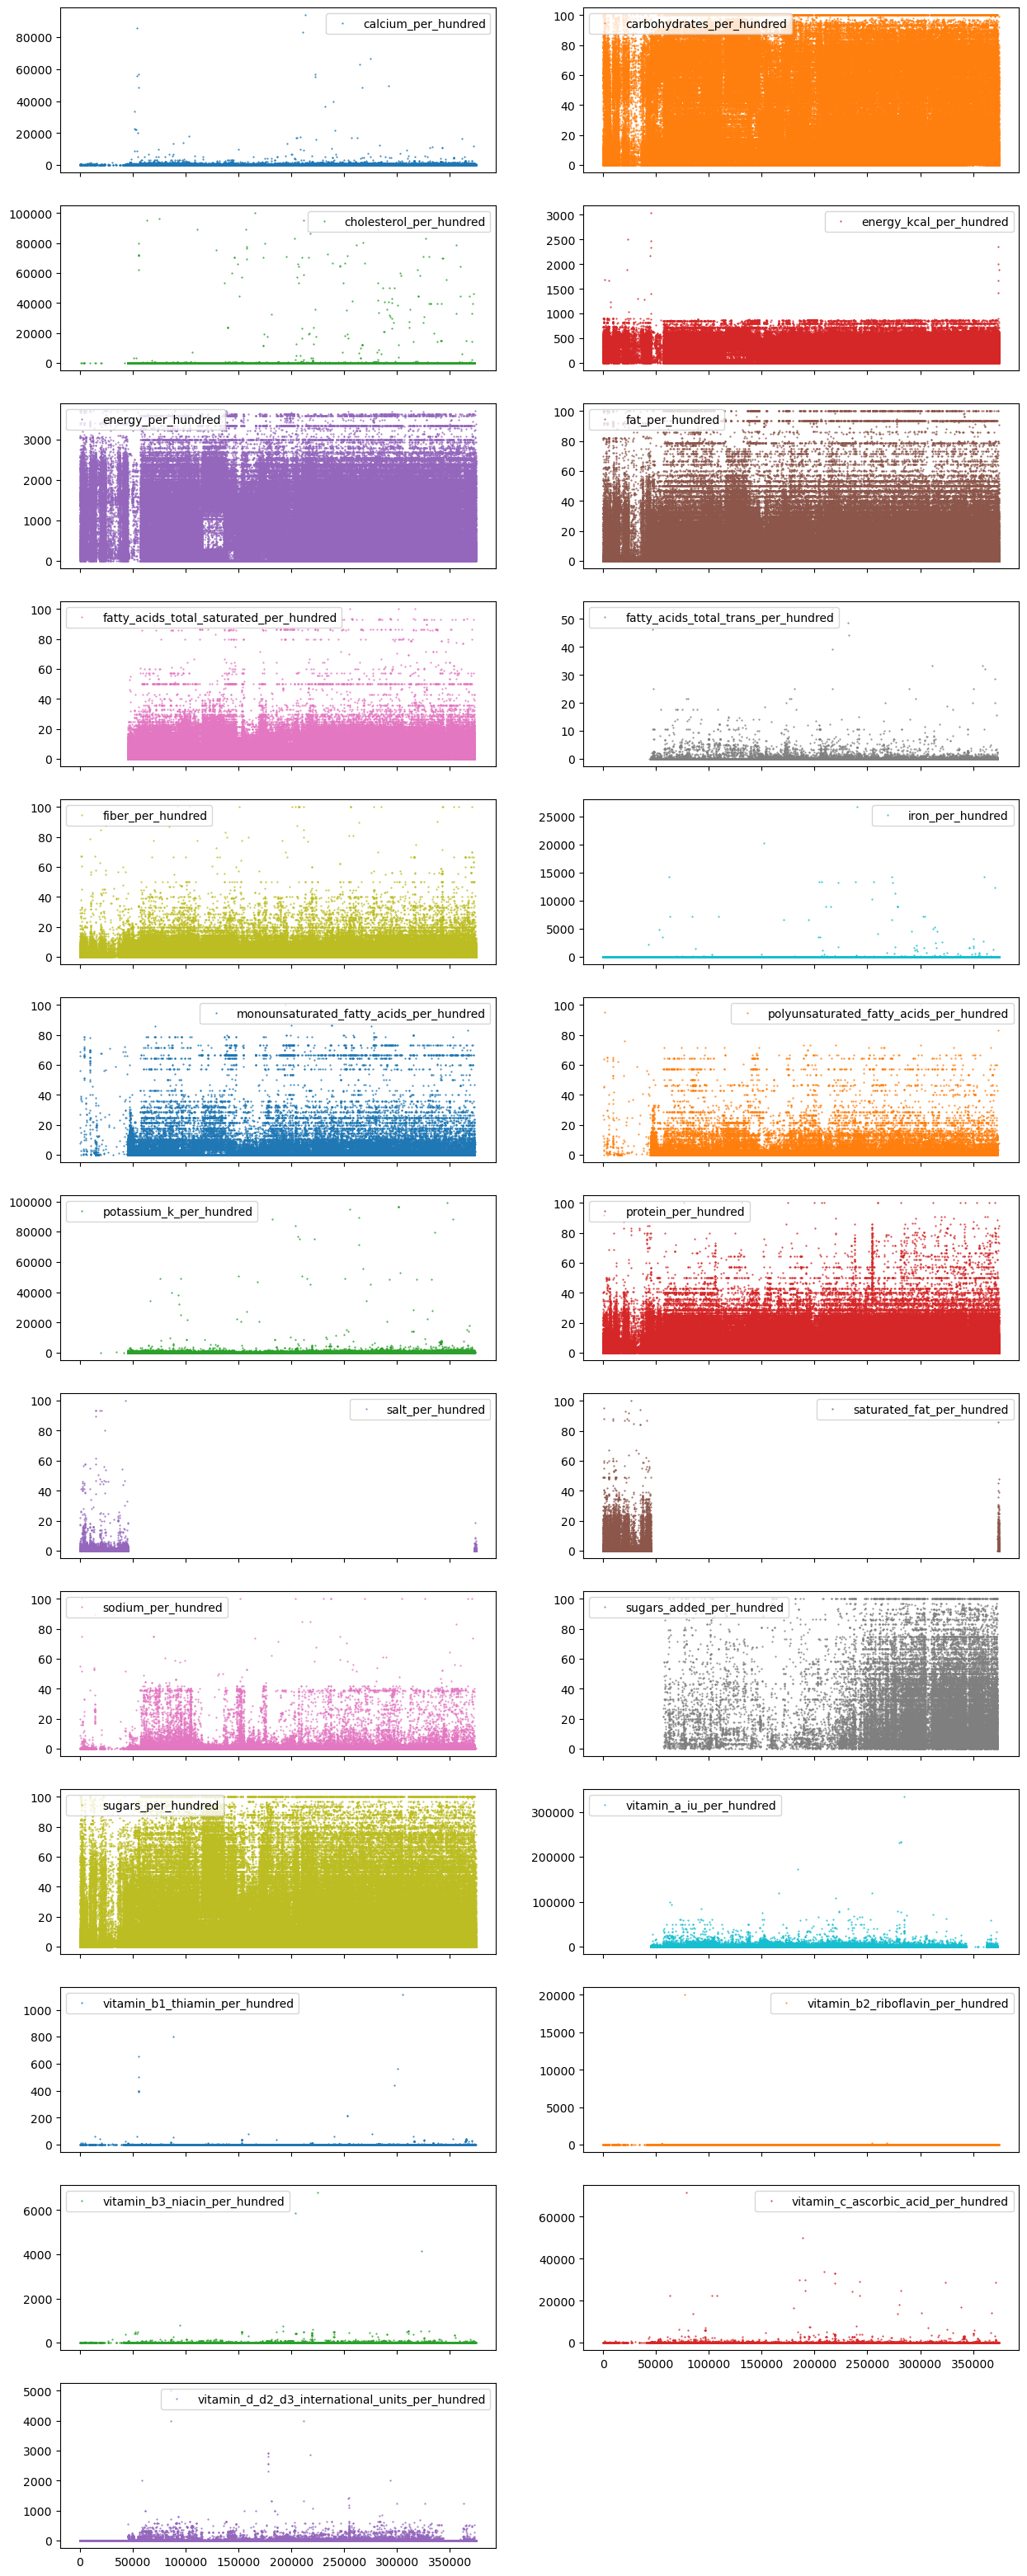

In [69]:
# Plot changes in the statistics of the _hundred variables
df[per_hundred_columns].plot(lw=0, marker=".", subplots=True, layout=(-1, 2), figsize=(15, 40), markersize=1);

### 4. Columns in our data set may be related to each other or pose constraints on one another.Unfortunately, this may also give rise to inconsistencies. Allowing for some rounding errors, your task is to investigate the three cases below and address any problems

##### a) The column energy_per_hundred measures the energy content in kJ. Analyse its relationship with the column energy_kcal_per_hundred, for example using a scatterplot, identify potential problems and address them.

**Observaciones y comentarios:** Here I identify problems or inconsistencies between energy in KJ and Kcal to align both values. To do this, I checked for missing values in the energy columns, replaced the missing values in the KJ column with values from the KCal column and aligned the values using a conversion factor of 1KCal = 4.184KJ (Ref. chapter 2.3.8). The interesting thing about this exercise is that I removed the rows without KJ energy values here, as this is the primary variable in the subsequent analyses. It was important to consider the missing values because they can introduce biases and reduce the power of statistical tests, leading to erroneous conclusions.  These lines represented only 5.8% of the total data. If the data were less or more data were needed for another task, I would explored other ways to fill in the missing data without altering the statistics of the data.

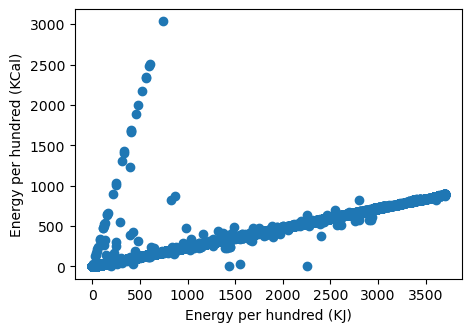

In [70]:
# Scatter plot Energy per hundred (KJ) vs Energy per hundred (KCal)
# Properties
plt.figure(figsize=(5,3.5))
# Scatter plot
plt.scatter(df["energy_per_hundred"], df["energy_kcal_per_hundred"])
plt.xlabel("Energy per hundred (KJ)")
plt.ylabel("Energy per hundred (KCal)")
plt.show()

In [71]:
# Identify missing values in both energy columns 
missing_energy = df["energy_per_hundred"].isna().sum()
missing_energy2 = df["energy_kcal_per_hundred"].isna().sum()

print("Energy per hundred (KJ):", missing_energy, "Energy per hundred (Kcal):", missing_energy2)

Energy per hundred (KJ): 20731 Energy per hundred (Kcal): 20714


In [72]:
# The missing values in the KJ energy column were replaced with values from the column containing energy in Kcal
df["energy_per_hundred"]= df["energy_per_hundred"].fillna(df["energy_kcal_per_hundred"])
energy_per_hundred_re = df["energy_per_hundred"].isnull().sum()
print("Update missing values in energy_per_hundred:", energy_per_hundred_re)

Update missing values in energy_per_hundred: 20624


In [73]:
# Drop missing values on energy_per_hundred
df = df.dropna(subset=["energy_per_hundred"])
print("Remaining shape of the dataFrame:", df.shape)

Remaining shape of the dataFrame: (333414, 65)


In [74]:
# Aling the values of Energy per hundred (KJ) vs Energy per hundred (KCal) using a factor of conversion of 1 kilocalorie (kcal) = 4.184 kilojoules (kJ) chapter 2.3.8
df["energy_kcal_per_hundred"] = df["energy_per_hundred"] / 4.184

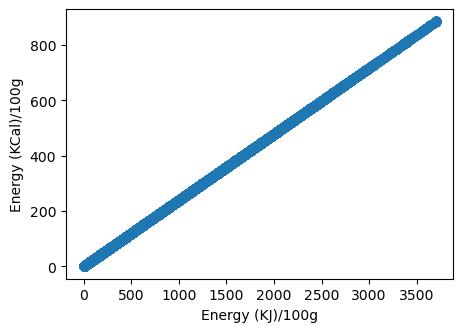

In [75]:
# Update the scatter plot Energy per hundred (KJ) vs Energy per hundred (KCal)
# Properties
plt.figure(figsize=(5,3.5))
# Scatter plot
plt.scatter(df["energy_per_hundred"], df["energy_kcal_per_hundred"])
plt.xlabel("Energy (KJ)/100g")
plt.ylabel("Energy (KCal)/100g")
plt.show()

##### b) The column energy_per_hundred is also related to the macronutrient columns (protein, fat, carbohydrates, salt,and fiber), because these macronutrients have a specific energy content in kJ per hundred gram (e.g. fat 37 kJ/g,protein and carbohydrates 17 kJ/g). Check these columns for potential inconsistency.

**Remarks and comments:** To address the inconsistencies observed in this question, I first calculated the energy in kilojoules (KJ) for each macronutrient and then calculated the total energy of the macronutrients (energy_macronutrients_kj). To observe the inconsistencies, I created a table showing the macronutrient values associated with the rows where the condition energy_macronutrients_kj > energy_per_hundred was met. The table showed values of ≈ 3500 for energy_macronutrients_kj, while energy_per_hundred showed values of ≈1700. To visualise the relationship between the two variables, I created a scatter plot, where the red line represented products with equal energy values, which corresponded to ≈14500 products. 

Once these new inconsistencies were identified, I adjusted the macronutrient values based on their proportional contribution to the energy value of the product. I then recalculated energy_macronutrients_kj and again identified inconsistencies between energy_macronutrients_kj and energy_per_percent. After those changes the remaining inconsistencies were mainly due to NA values in the nutrient energy (e.g fat_per_hundred_KJ=NA), resulting in a 0 value for energy_macronutrients_kj or (energy_macronutrients_kj > energy_per_hundred). According to the criteria low energy_macronutrients_kj values were replaced by energy_per_hundred. Once the updates were made, I also updated the scatter diagram again to see the changes made.

In [76]:
# Calculate the energy of macronutrients in KJ
df["fat_per_hundred_KJ"] = df["fat_per_hundred"]*37 # Ref. https://bit.ly/3o5QvnL
df["protein_per_hundred_KJ"]= df["protein_per_hundred"]*17
df["carbohydrates_per_hundred_KJ"] =df["carbohydrates_per_hundred"]*17
df["fiber_per_hundred_KJ"]= df["fiber_per_hundred"]*8

# Create a column for total macronutrients in KJ
df["energy_macronutrients_kj"]= df[["fat_per_hundred_KJ", "protein_per_hundred_KJ", "carbohydrates_per_hundred_KJ", "fiber_per_hundred_KJ"]].sum(axis=1, skipna=True)

# Visualise the inconsistencies between the energy in total macronutrients and energy_per_hundred
inconsistencies1= df[df["energy_macronutrients_kj"]>df["energy_per_hundred"]]
inconsistencies1=inconsistencies1[["product_name_en","energy_per_hundred","energy_macronutrients_kj", "fat_per_hundred_KJ", "protein_per_hundred_KJ", "carbohydrates_per_hundred_KJ", "fiber_per_hundred_KJ"]]
inconsistencies1.sort_values(by="energy_macronutrients_kj", ascending=False).head(3)

product_name_en  energy_per_hundred  \
125596      DIERBERGS MARKETS, SOFT CHERRY CANDY BALLS             1673.60   
210663         HAPPY EASTER CARAMEL AND BUNNY CORN MIX             1953.93   
138579  SAVEURS, EXTRA VIRGIN OLIVE OIL, WHITE TRUFFLE             3627.53   

        energy_macronutrients_kj  fat_per_hundred_KJ  protein_per_hundred_KJ  \
125596                   5400.00              3700.0                    0.00   
210663                   5369.62              3700.0                   56.61   
138579                   5173.39              3700.0                  113.39   

        carbohydrates_per_hundred_KJ  fiber_per_hundred_KJ  
125596                       1700.00                   0.0  
210663                       1586.61                  26.4  
138579                       1360.00                   NaN

Number of products where the energy of macronutries = energy_per_hundred: 14616 
and where are different: 318731


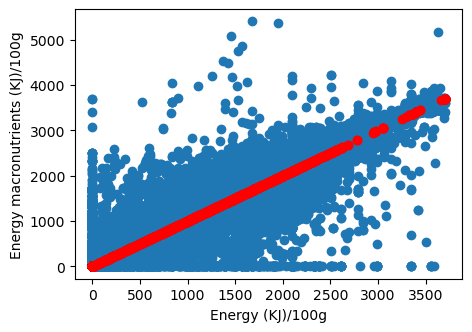

In [77]:
# scatter plot Energy per hundred (KJ) vs energy_macronutrients (KJ)
# Properties
plt.figure(figsize=(5,3.5))

# Scatter plot
plt.scatter(df["energy_per_hundred"], df["energy_macronutrients_kj"])
plt.xlabel("Energy (KJ)/100g")
plt.ylabel("Energy macronutrients (KJ)/100g")
# Scatter plot subplot
subplot = df[df["energy_macronutrients_kj"] == df["energy_per_hundred"]]
num_rows = df[np.abs(df["energy_macronutrients_kj"] - df["energy_per_hundred"]) > 0.01]
plt.scatter(subplot["energy_per_hundred"], subplot["energy_macronutrients_kj"],color="red")

print("Number of products where the energy of macronutries = energy_per_hundred:", len(subplot), "\nand where are different:",len(num_rows))
plt.show()

In [78]:
# Adjust the energy in KJ of the macronutries 
df["fat_per_hundred_KJ"] = ((df["fat_per_hundred_KJ"] / df["energy_macronutrients_kj"] * 100)*df["energy_per_hundred"])/100
df["fat_per_hundred_n"] = df["fat_per_hundred_KJ"] / 37

df["protein_per_hundred_KJ"] = ((df["protein_per_hundred_KJ"] / df["energy_macronutrients_kj"] * 100)*df["energy_per_hundred"])/100
df["protein_per_hundred_n"] = df["protein_per_hundred_KJ"] / 17

df["carbohydrates_per_hundred_KJ"] = ((df["carbohydrates_per_hundred_KJ"] / df["energy_macronutrients_kj"] * 100)*df["energy_per_hundred"])/100
df["carbohydrates_per_hundred_n"] = df["carbohydrates_per_hundred_KJ"] / 17

df["fiber_per_hundred_KJ"] = ((df["fiber_per_hundred_KJ"] / df["energy_macronutrients_kj"] * 100)*df["energy_per_hundred"])/100
df["fiber_per_hundred_n"] = df["fiber_per_hundred_KJ"] / 8

# Update the column for the ajusted total macronutrients in KJ
df["energy_macronutrients_kj"]= df[["fat_per_hundred_KJ", "protein_per_hundred_KJ", "carbohydrates_per_hundred_KJ", "fiber_per_hundred_KJ"]].sum(axis=1, skipna=True)

# Visualise the inconsistencies between the energy in total macronutrients and energy_per_hundred
inconsistencies = df[np.abs(df["energy_macronutrients_kj"] - df["energy_per_hundred"]) > 0.01]
inconsistencies_table=inconsistencies[["product_name_en","energy_per_hundred","energy_macronutrients_kj", "fat_per_hundred_KJ", "protein_per_hundred_KJ", "carbohydrates_per_hundred_KJ",   "fiber_per_hundred_KJ"]]
print("Number of products where the energy of macronutries is different energy_per_hundred:", len(inconsistencies))
inconsistencies_table.sort_values(by="energy_macronutrients_kj", ascending=False).tail(3)

Number of products where the energy of macronutries is different energy_per_hundred: 1658


product_name_en  energy_per_hundred  \
96250    MARKET PANTRY, SUGAR FREE DRINK MIX, LEMONADE             1100.39   
96249   MARKET PANTRY, DRINK MIX, STRAWBERRY, LEMONADE             1305.41   
374812                    Nestea - Lemon (zero sugars)                5.00   

        energy_macronutrients_kj  fat_per_hundred_KJ  protein_per_hundred_KJ  \
96250                        0.0                 NaN                     NaN   
96249                        0.0                 NaN                     NaN   
374812                       0.0                 NaN                     NaN   

        carbohydrates_per_hundred_KJ  fiber_per_hundred_KJ  
96250                            NaN                   NaN  
96249                            NaN                   NaN  
374812                           NaN                   NaN

In [79]:
# Address on the incongreunce seen before
# Count of rows in a DataFrame that meet certain macronutrient criteria
count_condition = ((df["energy_macronutrients_kj"] < df["energy_per_hundred"]) & (pd.isna(df["fat_per_hundred_KJ"])|(df["fat_per_hundred_KJ"] == 0)) & (pd.isna(df["fiber_per_hundred_KJ"])|(df["fiber_per_hundred_KJ"] == 0))&
             (pd.isna(df["protein_per_hundred_KJ"])| (df["protein_per_hundred_KJ"] == 0)) & (pd.isna(df["carbohydrates_per_hundred_KJ"])|(df["carbohydrates_per_hundred_KJ"] == 0))).sum()

# Updating the energy_macronutrients_kj values according to certain criteria of a data frame
condition = df[(df["energy_macronutrients_kj"] < df["energy_per_hundred"]) & (pd.isna(df["fat_per_hundred_KJ"])|(df["fat_per_hundred_KJ"] == 0)) & (pd.isna(df["fiber_per_hundred_KJ"])|(df["fiber_per_hundred_KJ"] == 0))&(pd.isna(df["protein_per_hundred_KJ"])| (df["protein_per_hundred_KJ"] == 0)) & (pd.isna(df["carbohydrates_per_hundred_KJ"])|(df["carbohydrates_per_hundred_KJ"] == 0))]
df.loc[condition.index, "energy_macronutrients_kj"] = condition.loc[condition["energy_macronutrients_kj"] < condition["energy_per_hundred"], "energy_per_hundred"] 

# Identify changes in the count of rows in a DataFrame that meet certain macronutrient criteria
count_corrected_condition = ((df["energy_macronutrients_kj"] < df["energy_per_hundred"]) & (pd.isna(df["fat_per_hundred_KJ"])|(df["fat_per_hundred_KJ"] == 0)) & (pd.isna(df["fiber_per_hundred_KJ"])|(df["fiber_per_hundred_KJ"] == 0))&
             (pd.isna(df["protein_per_hundred_KJ"])| (df["protein_per_hundred_KJ"] == 0)) & (pd.isna(df["carbohydrates_per_hundred_KJ"])|(df["carbohydrates_per_hundred_KJ"] == 0))).sum()

print("The number of rows where the criteria is meet:", count_condition)
print("The number of rows where the criteria is meet after the updating:", count_corrected_condition)

The number of rows where the criteria is meet: 1658
The number of rows where the criteria is meet after the updating: 0


14616


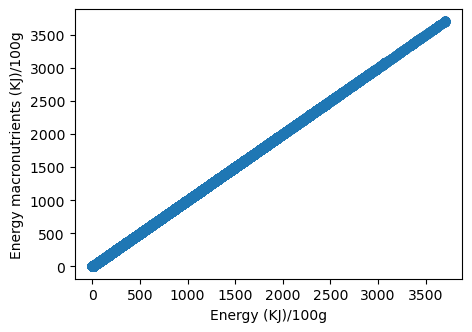

In [80]:
# scatter plot Energy per hundred (KJ) vs energy_macronutrients (KJ)
# Properties
plt.figure(figsize=(5,3.5))

plt.scatter(df["energy_per_hundred"], df["energy_macronutrients_kj"])
plt.xlabel("Energy (KJ)/100g")
plt.ylabel("Energy macronutrients (KJ)/100g")

print(len(subplot))
plt.show()

##### c) The main macronutrients (protein, fat, carbohydrates, and fiber) make up the bulk of a product. However, theoverall contribution per hundred gram is limited by the presence of other macronutrients. Check for inconsistency.

 **Remarks and comments:** Taking into account the macronutrients mentioned (protein, fat, carbohydrates and fibre) I calculate the total macronutrients in grams. The macronutrients used are the ones I calculated in the previous question. To visualise whether they exceeded 100 grams, I made a scatter plot where it can be seen that there are more than 6000 products that exceed 100 grams. I selected these values and replaced them with the original macronutrient value, then recalculated the total macronutrients in grams and identified that around 6000 products still exceeded 100 grams. I then created a table to show these products exceeding 100 grams. The table has rows where the individual values of 2 or 3 macronutrients are 100, and their sum exceeds the 100 gram threshold. Since I have no further information to correct these data effectively, and I cannot arbitrarily reassign these values without the necessary knowledge, and considering that these data represent 1.9% of the total data, I have decided to remove them.

There are 9432 products in the database that have macronutrients that add up to more than 100 grams of the product.


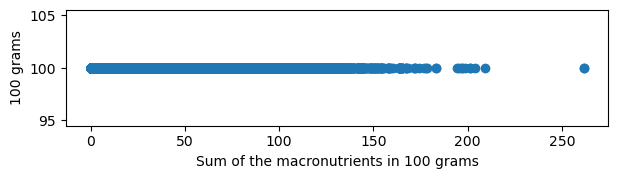

In [81]:
# Identify the macronutients that add up to more than 100 grams of the product

df["macro_100g"] = df[["fat_per_hundred_n", "protein_per_hundred_n", "carbohydrates_per_hundred_n", "fiber_per_hundred_n"]].sum(axis=1, skipna=True)
main_macro_above100g = (df["macro_100g"] > 100).sum()
print(f"There are {main_macro_above100g} products in the database that have macronutrients that add up to more than 100 grams of the product.")

# Scatter plot Sum of the macronutrients per hundred vs 100 grams
plt.figure(figsize=(7,1.5))
plt.scatter(df["macro_100g"],[100]*len(df))
plt.xlabel("Sum of the macronutrients in 100 grams")
plt.ylabel("100 grams")
plt.show()

In [82]:
#  Update columns with suffix "_n" based on values from other columns for specific rows
mask = df["macro_100g"] > 100
df.loc[mask,"fat_per_hundred_n"]= df.loc[mask,"fat_per_hundred"]
df.loc[mask,"protein_per_hundred_n"]= df.loc[mask,"protein_per_hundred"]
df.loc[mask,"fiber_per_hundred_n"]= df.loc[mask,"fiber_per_hundred"]
df.loc[mask,"carbohydrates_per_hundred_n"]= df.loc[mask,"carbohydrates_per_hundred"]
                                                         
df["macro_100g"] = df[["fat_per_hundred_n", "protein_per_hundred_n", "carbohydrates_per_hundred_n", "fiber_per_hundred_n"]].sum(axis=1, skipna=True)
main_macro_above100 = (df["macro_100g"] > 100).sum()

print(f"There are {main_macro_above100} products in the database that have macronutrients that add up to more than 100 grams of the product.")

There are 6395 products in the database that have macronutrients that add up to more than 100 grams of the product.


In [83]:
# Display of the highest macro_100g values in the products database 
macros_outliers=df[df["macro_100g"] > 100][["product_name_en","macro_100g","energy_per_hundred", "energy_macronutrients_kj","fat_per_hundred_n", "protein_per_hundred_n", "carbohydrates_per_hundred_n", "fiber_per_hundred_n"]]
macros_outliers.sort_values(by="macro_100g", ascending=False).head(5)

product_name_en  macro_100g  \
342663  ORGANIC CEREMONIAL GRADE MATCHA JAPANESE SINGL...      300.00   
183477                              ROASTED SEAWEED SNACK      210.00   
124734                              ROASTED SEAWEED SNACK      210.00   
353554                                  WILD COCOA POWDER      208.37   
353556            ORGANIC MATCHA GREEN TEA POWDER, MATCHA      200.00   

        energy_per_hundred  energy_macronutrients_kj  fat_per_hundred_n  \
342663             2092.00                   2092.00               0.00   
183477             2510.40                   2510.40              50.00   
124734             2510.40                   2510.40              50.00   
353554             1744.73                   1744.73              16.67   
353556             1255.20                   1255.20                NaN   

        protein_per_hundred_n  carbohydrates_per_hundred_n  \
342663                 100.00                       100.00   
183477                  80.00                        40.00   
124734                  80.00                        40.00   
353554                  41.67                        83.33   
353556                 100.00                          NaN   

        fiber_per_hundred_n  
342663                100.0  
183477                 40.0  
124734                 40.0  
353554                 66.7  
353556                100.0

In [84]:
# Drops rows where the sum of macronutrients is greater than 100 grams after the changes implemented
df.drop(df[df["macro_100g"]>100].index, inplace=True)

In [85]:
# Drop the columns created in this step, as they will not be used in subsequent analyses and introduce noise or confusion in the correlation analysis
df = df.drop([ "fat_per_hundred_KJ", "protein_per_hundred_KJ", "carbohydrates_per_hundred_KJ","fiber_per_hundred_KJ"], axis=1)

In [86]:
print(df.shape)

(327019, 71)


### 5.Despite removing recording errors from the per_hundred columns, some of them stillcontain “extreme” values, which are distinct from the rest of the data points. 

Your goal isto pick a few variables from the per_hundred list and address outliers. Be mindful that some outlier detection approaches are not reliable when the underlying variables arestrongly skewed.

**Remarks and comments:** Eliminating outliers even if the information they present is legitimate will depend on what is being studied. But it is relevant when subsequently performing an analysis of the correlation between variables, as is the case below. When performing this type of data analysis or modelling, outliers should be removed even if this information is legitimate. For instance, there are high salt data that refer to salt as a product or high energy data that refer to oil products. Even if these data are correct, they do not capture the full relationship of most of the data and may lead to erroneous assumptions about the relationship between variables.

In this task, I removed outliers such as vitamin b2 with a value of 20000 or vitamin A with a value of 333333, which are more than three times the standard deviation of the mean. The outliers on these variables were also visible on exercise 3.b. In some cases is recomendable to standrize the values of the variables before proceeding to further analyses, such as machine learning, given the diversity of the variables under study. However, this is not the aim of this task, and is something to keep in mind for other analyses in the future.

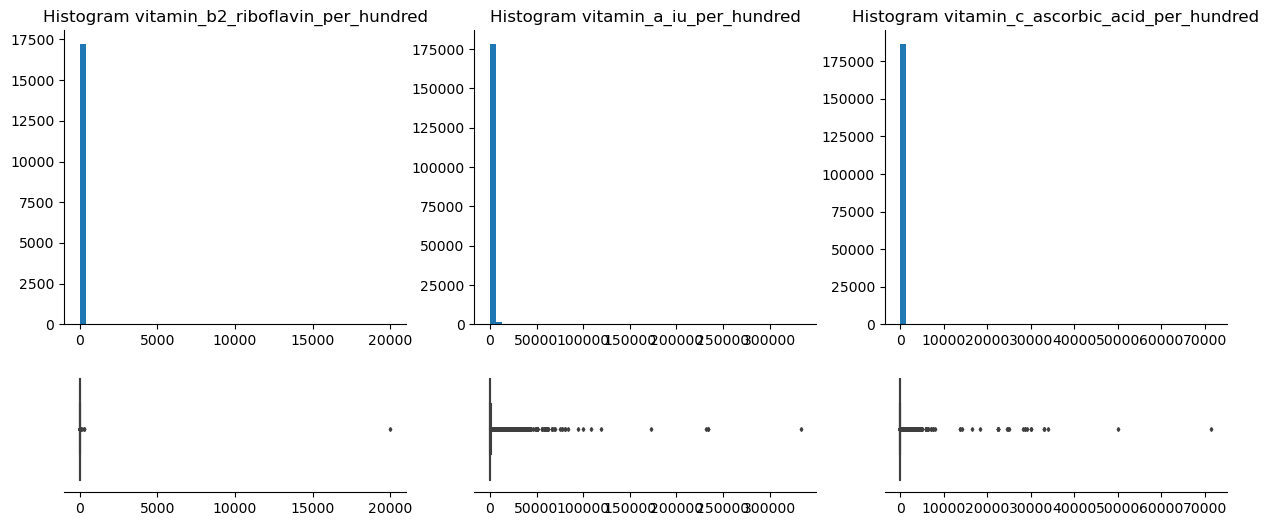

In [87]:
import seaborn as sns

fig, axes = plt.subplots(
    2, 3, gridspec_kw={"height_ratios": (0.7, 0.3)}, figsize=(15, 6)
)

for (feat, plot_col) in zip(
    [ "vitamin_b2_riboflavin_per_hundred","vitamin_a_iu_per_hundred", "vitamin_c_ascorbic_acid_per_hundred"], [0, 1, 2]  # pairing feature with column in plot
):
    axes[0, plot_col].hist(df[feat], bins=50)
    axes[0, plot_col].set_title("Histogram {}".format(feat))
    sns.despine(ax=axes[0, plot_col])
    sns.boxplot(data=df[feat], orient="h", ax=axes[1, plot_col], fliersize=2)
    axes[1, plot_col].set(yticks=[])
    sns.despine(ax=axes[1, plot_col], left=True)

for ax in axes.flatten():
    ax.set_xlabel("")

plt.show()

In [88]:
# Display of the highest vitamin_b2 values in the products database 
top_5_names_vitamin_b2 = df.nlargest(5,"vitamin_b2_riboflavin_per_hundred")
top_5_names_vitamin_b2[["product_name_en","vitamin_b2_riboflavin_per_hundred"]]

product_name_en  \
77377   BIMBO, PAN TOSTADO INTEGRAL TOASTED WHEAT BREAD   
268773                 THE ORIGINAL ITALIAN PIZZA CRUST   
254231                HIGH-PROTEIN NUTRITION WITH FIBER   
13953                                 HIPP Ha Combiotik   
219541          LOW CALORIE VITAMIN & MINERAL DRINK MIX   

        vitamin_b2_riboflavin_per_hundred  
77377                            20000.00  
268773                             294.12  
254231                             258.33  
13953                               80.00  
219541                              56.67

In [89]:
# Z-score 3 times the standard deviation from the mean to remove the 20000 vitamin b2 isolated point  
filter_vitamin_b2 = np.abs(df["vitamin_b2_riboflavin_per_hundred"] - df["vitamin_b2_riboflavin_per_hundred"].mean())>(3*df["vitamin_b2_riboflavin_per_hundred"].std())
df = df.loc[-filter_vitamin_b2]
print(df.shape)

(327018, 71)


In [90]:
# Display of the highest vitamin_a values in the products database 
top_5_names_vitamin_a = df.nlargest(5,"vitamin_a_iu_per_hundred")
top_5_names_vitamin_a[["product_name_en","vitamin_a_iu_per_hundred", "energy_per_hundred"]]

product_name_en  \
284710           SPIRULINA POWDER NUTRIENT RICH SUPERFOOD   
281274  SPIRULINA 1000 MG DOUBLE STRENGTH NUTRIENT RIC...   
281275                            SPIRULINA 500MG TABLETS   
279962                     GROUP RAISED CALF LIVER SLICES   
183844                        ORGANIC CARROT JUICE POWDER   

        vitamin_a_iu_per_hundred  energy_per_hundred  
284710                  333333.0             1903.72  
281274                  233333.0             1393.27  
281275                  233333.0             1393.27  
279962                  231696.0              485.34  
183844                  172727.0             1522.98

In [91]:
# Z-score 3 times the standard deviation from the mean to remove vitamin_b1 isolated point  
filter_vitamin_a = np.abs(df["vitamin_a_iu_per_hundred"] - df["vitamin_a_iu_per_hundred"].mean())>(3*df["vitamin_a_iu_per_hundred"].std())
df = df.loc[-filter_vitamin_a]
print(df.shape)

(325476, 71)


In [92]:
# Display of the highest vitamin_c values in the products database 
top_5_names_vitamin_c = df.nlargest(5,"vitamin_c_ascorbic_acid_per_hundred")
top_5_names_vitamin_c[["product_name_en","vitamin_c_ascorbic_acid_per_hundred"]]

product_name_en  \
78513                                APPLESAUCE   
188771                       100% ORGANIC JUICE   
209375                                    JUICE   
219536  LOW CALORIE VITAMIN & MINERAL DRINK MIX   
219544  LOW CALORIE VITAMIN & MINERAL DRINK MIX   

        vitamin_c_ascorbic_acid_per_hundred  
78513                               71428.6  
188771                              50000.0  
209375                              33898.3  
219536                              33000.0  
219544                              33000.0

In [93]:
# Z-score 3 times the standard deviation from the mean to remove vitamin_b3 isolated point  
filter_vitamin_c = np.abs(df["vitamin_c_ascorbic_acid_per_hundred"] - df["vitamin_c_ascorbic_acid_per_hundred"].mean())>(3*df["vitamin_c_ascorbic_acid_per_hundred"].std())
df = df.loc[-filter_vitamin_c]
print(df.shape)

(325248, 71)


## D. EDA: Text data

The essential methods and skills for data analysis can vary from one data type to another. For instance, text data requires different manipulation techniques than numerical data. One example of text data in the Open Food database is available in the ingredients_en column. In this task, you will work with the ingredients_en column; your goal is to preprocess the text data in this column and answer the following questions.

### 1. Find the product with the longest ingredients list, i.e. the largest number of ingredients. Print the product name and its ingredient list.

**Remarks and comments:** In this section, I have answered the question using Pandas idxmax function. After obtaining the maximum number of ingredients, I created a list to associate the product name with its corresponding list of ingredients.

In [94]:
# Selection of the product with the longest list of ingredients 
max_ingredients = df["ingredients_en"].str.len().idxmax() #(Ref.https://bit.ly/3KTTw3t)

# Name of the product 
name_ingredients = df.loc[max_ingredients, "product_name_en"]

# List of the product with the longest list of ingredients 
list_ingredients = df.loc[max_ingredients, "ingredients_en"]

print("Product with the longest list of ingredients:",name_ingredients,"\nList of ingredients:", list_ingredients)

Product with the longest list of ingredients: VANILLA AND RASPBERRY, RED VELVET, CARROT, CHOCOLATE VARIETY PETIT FOURS, VANILLA AND RASPBERRY, RED VELVET, CARROT, CHOCOLATE 
List of ingredients: WATER, POWDERED SUGAR (SUGAR, CORN STARCH), CHOCOLATE ICING (SUGAR, WATER, PALM OIL, CORN SYRUP, COCOA PROCESSED WITH ALKALI, CONTAINS 2% OR LESS OF: CARAMEL COLOR, CELLULOSE GUM, MONO- AND DIGLYCERIDES, NATURAL AND ARTIFICIAL FLAVOR, POLYSORBATE 60, POTASSIUM SORBATE [PRESERVATIVE], SORBIC ACID [PRESERVATIVE], SALT, SOY LECITHIN, SOYBEAN OIL, SULFITES, XANTHAN GUM), CARROT CAKE (SUGAR, ENRICHED WHEAT FLOUR BLEACHED [FLOUR, NIACIN, REDUCED IRON, THIAMINE MONONITRATE, RIBOFLAVIN, FOLIC ACID], SOYBEAN OIL, DEXTROSE, CARROTS, FOOD STARCH-MODIFIED, DRIED EGG YOLK, LEAVENING [BAKING SODA, SODIUM ACID PYROPHOSPHATE, SODIUM ALUMINUM PHOSPHATE, ALUMINUM SULFATE], DRIED EGG WHITES, NATURAL AND ARTIFICIAL FLAVOR, SALT, XANTHAN GUM, PROPYLENE GLYCOL, GUAR GUM, WATER, CARAMEL COLOR, CORN SYRUP, POLYSORBATE

### 2. Find the products with the shortest ingredients list, i.e. the fewest ingredients. Display some examples and comment on your observation.

**Remarks and comments:** Here I have used the same approach as in the previous question to select the product with the minimum number of ingredients, this time using pandas idxmin.

In [95]:
# Selection of the product with the shortest list of ingredients 
min_ingredients = df["ingredients_en"].str.len().idxmin() #( Ref. https://bit.ly/3MFdO1K)

# Name of the product 
name_min_ingredients = df.loc[min_ingredients, "product_name_en"]

# List of ingredients
list_min_ingredients = df.loc[min_ingredients, "ingredients_en"]

print("Product with the longest list of ingredients:",name_min_ingredients,"\nList of ingredients:", list_min_ingredients)

Product with the longest list of ingredients: Bonne Maman La Madeleine chocolat au lait 
List of ingredients: é


### 3. Which are the most frequent ingredients in products? You will also choose an appropriate method to visualize your findings.


Be careful with text normalization:
* punctuation, e.g., “water.” vs. “water”
* capitalization, e.g., “water” vs. “Water”
* white spaces removal, e.g., “ water” vs. “water”
* special characters, e.g. “raw beef [soja sauce (with ble), …]”

**Remarks and comments:** After careful consideration of the comments section relating to this qu, I have formulated an approach to address this question. In doing so, I have taken into account the questions of some students and I have also used Panagiota's recommendations on the use of regular expression operations (Ref. https://bit.ly/2DPgEdr) and counter (Ref. https://bit.ly/3Uy7s6i) to process the data efficiently.

To start with, I used regular expression operations to remove all space characters, whitespace and punctuation marks from the input text. This helped me produce a clean and standardised list of ingredients. I then converted all the remaining text to lowercase, which made the data easier to handle. Once I had a clean list of ingredients, I used counter to generate a dictionary, which I used to go through the list and identify the most frequent words. Finally, to present the results in a concise and visually appealing way, I created a bar chart representing the ranking of the 20 most frequent words. A bar chart is the most effective way to quickly display a ranking, and it allowed me to easily identify the most frequently used ingredients. The frequency ranking of ingredients is contingent upon the cleanliness of the table in the preceding stages. This means that the classification of non-data or removal of lines with high values can impact the results. 

As anticipated, the most commonly mentioned ingredients were water, salt, and sugar.

In [96]:
import re #(Ref. https://bit.ly/2DPgEdr)

# Clean the list of ingredients
def clean_ingredients_list(ingredients_en):
    ingredients_en = re.sub(r"\[.*?>\]", "", ingredients_en) # remove 
    ingredients_en = re.sub(r"\(.*?>\)", "", ingredients_en) # remove characters
    ingredients_en = re.sub(r"\s+", " ", ingredients_en).strip() # remove whitespaces
    ingredients_en = re.sub(r"\[^\w\s]", "", ingredients_en).lower()
    ingredients = ingredients_en.split(", ")
    return ingredients    

In [97]:
from collections import Counter
# Create a new column to the clean ingredients
df["clean_list_ingredientes"] = df["ingredients_en"].apply(clean_ingredients_list)

# Count the frequency of ingredients 
ingredient_frequency = Counter()
for ingredients in df["clean_list_ingredientes"]:
    ingredient_frequency.update(ingredients)
    
print(ingredient_frequency.most_common(20))    

[('salt', 221843), ('sugar', 142355), ('water', 134590), ('citric acid', 56617), ('niacin', 43228), ('corn syrup', 41762), ('riboflavin', 39449), ('natural flavor', 35389), ('soy lecithin', 33320), ('dextrose', 33280), ('reduced iron', 32823), ('spices', 31704), ('folic acid)', 31237), ('soybean oil', 27850), ('sea salt', 27815), ('xanthan gum', 26089), ('thiamine mononitrate', 25775), ('natural flavors', 24671), ('high fructose corn syrup', 21846), ('maltodextrin', 21520)]


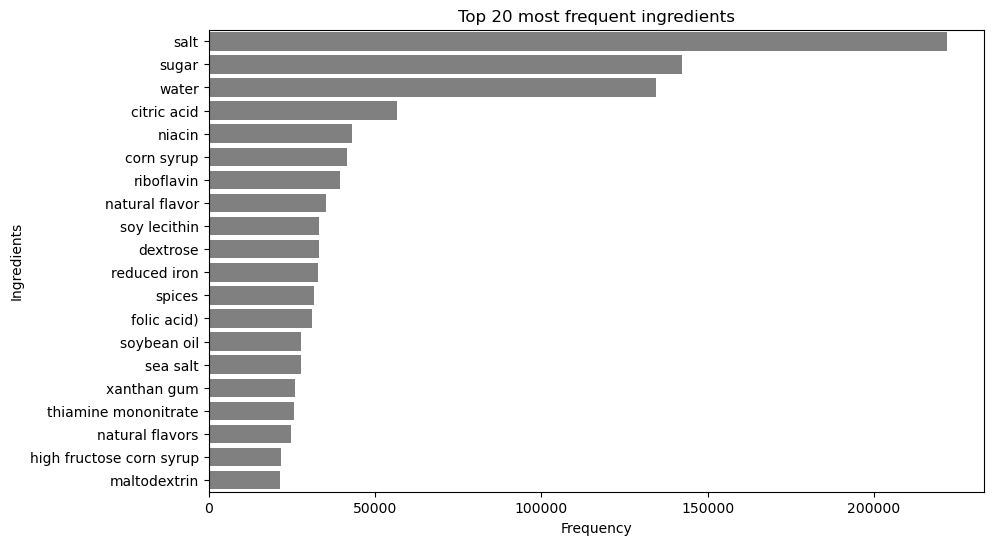

In [98]:
# Properties
fig, ax = plt.subplots(figsize=(10,6))
ranking=20
top_ingredients = ingredient_frequency.most_common(ranking)

# Barplot
sns.barplot(x=[count for ingredients, count in top_ingredients],
            y=[ingredients for ingredients, count in top_ingredients],
            color="grey",
            ax=ax)

# Title of the plot, axes and labels
ax.set_xlabel("Frequency")
ax.set_ylabel("Ingredients")
ax.set_title(f"Top {ranking} most frequent ingredients")

plt.show()

## E. EDA: Time-series data


Another data type that requires specific methods and skills for analysis is time-series
data. Although the Open Food database is not a time-series database, it contains several
columns with dates and times, allowing for a simple investigation. In this task, you will
work with the created_at column that stores the date and time at which products were
added to the Open Food database. You will analyze the total number of products added to
the database.

Observaciones y comentarios: para responder esta pregunta regrese a al capitulo 06. Working with time-series data.

### 1. Your task is to investigate the total number of items created each month at each hour. You should use the created_at column to draw a heatmap with the hours (0 to 23) on the -axis and the months (1 to 12) on the -axis. The color of the heatmap should show the number of items created at each month-hour pair. As always include any observations and their discussion

**Remarks and comments:** Initially, I examined the format of the time data displayed in the created_at column. Following the procedure from chapter 6, I utilized the pd.to_datetime() function to convert the data into time format. I then proceeded to visualize the changes made and estimated the number of items created per month and time using the groupby function. The majority of the products were created between 6 am and 7 pm during the months of March to September.

In [99]:
# Visualise the data
df["created_at"].head(5)

0    2016-06-01T11:42:22.908Z
1    2016-06-01T11:42:25.111Z
2    2016-06-01T11:42:25.900Z
3    2016-06-01T11:42:26.184Z
4    2016-06-01T11:42:26.350Z
Name: created_at, dtype: object

In [100]:
# Crear dato temporal
df["created_at"] = pd.to_datetime(df["created_at"])
df["created_at"].head(5) # visualisat los datos

0   2016-06-01 11:42:22.908000+00:00
1   2016-06-01 11:42:25.111000+00:00
2   2016-06-01 11:42:25.900000+00:00
3   2016-06-01 11:42:26.184000+00:00
4   2016-06-01 11:42:26.350000+00:00
Name: created_at, dtype: datetime64[ns, UTC]

In [101]:
# Create columns for month and time in dataFrame
df["month"] = df["created_at"].dt.month
df["hour"] = df["created_at"].dt.hour

In [102]:
# Calculate the number of products created per hour and per month
df_time = df.groupby(["month","hour"]).size().unstack()
df_time

hour      0     1    2    3     5      6      7      8      9         10  \
month                                                                      
1        NaN   NaN  NaN  NaN   NaN    2.0   30.0   82.0  134.0     102.0   
2        NaN   NaN  NaN  NaN   NaN    NaN    4.0   87.0   71.0      54.0   
3        NaN   NaN  NaN  NaN   NaN    2.0   23.0  108.0   74.0      92.0   
4        NaN   NaN  NaN  NaN  20.0   35.0  155.0   84.0  119.0  304673.0   
5        NaN   NaN  1.0  NaN   NaN   16.0   57.0   90.0   58.0      39.0   
6        NaN   NaN  NaN  NaN   1.0  226.0  109.0  105.0  138.0      40.0   
7      343.0  69.0  NaN  NaN   1.0  720.0  136.0   59.0   53.0     276.0   
8        4.0   2.0  3.0  1.0   2.0    9.0   49.0   55.0   71.0      34.0   
9        NaN   NaN  NaN  NaN  28.0  323.0   97.0   96.0  151.0     142.0   
10       NaN   NaN  NaN  NaN   NaN   66.0   57.0   97.0   51.0      38.0   
11       NaN   NaN  NaN  1.0   NaN    NaN  229.0  250.0  186.0      52.0   
12       NaN   NaN  NaN  NaN   NaN    4.0   34.0   49.0   77.0      97.0   

hour      11     12     13     14     15      16     17     18      19     20  \
month                                                                           
1       10.0   61.0   77.0   40.0   21.0     8.0    9.0    1.0     7.0    3.0   
2       12.0   51.0   77.0   40.0   25.0     7.0    6.0    3.0    13.0   11.0   
3      234.0   78.0  100.0  132.0  103.0    41.0   62.0    7.0    17.0  105.0   
4       92.0   95.0   99.0   98.0   27.0    10.0   14.0    3.0    31.0   13.0   
5       67.0   64.0   67.0   68.0   40.0    13.0   18.0    9.0    17.0    NaN   
6       54.0  144.0  102.0  228.0  132.0    70.0   36.0   20.0     6.0   15.0   
7      216.0   60.0   53.0   65.0  124.0   760.0  245.0  227.0   393.0  958.0   
8       66.0   36.0   55.0   52.0   46.0    54.0   33.0   38.0    50.0   33.0   
9      256.0  282.0  201.0   69.0  170.0  1094.0  581.0  608.0  1043.0    5.0   
10     111.0  270.0   42.0   16.0  136.0     5.0   12.0   31.0    11.0   68.0   
11     189.0  135.0  132.0   54.0   19.0    77.0    7.0    7.0    56.0   67.0   
12      15.0   39.0  144.0   58.0   13.0    19.0   32.0    7.0     6.0   19.0   

hour      21     22     23  
month                       
1        NaN    1.0    NaN  
2       71.0    NaN    NaN  
3        9.0    NaN    NaN  
4       14.0    NaN    NaN  
5        NaN    NaN    NaN  
6       21.0   70.0    NaN  
7      461.0  383.0  318.0  
8       10.0    4.0    2.0  
9      316.0    NaN    NaN  
10      16.0    NaN    NaN  
11       2.0    4.0    NaN  
12      20.0    NaN    NaN

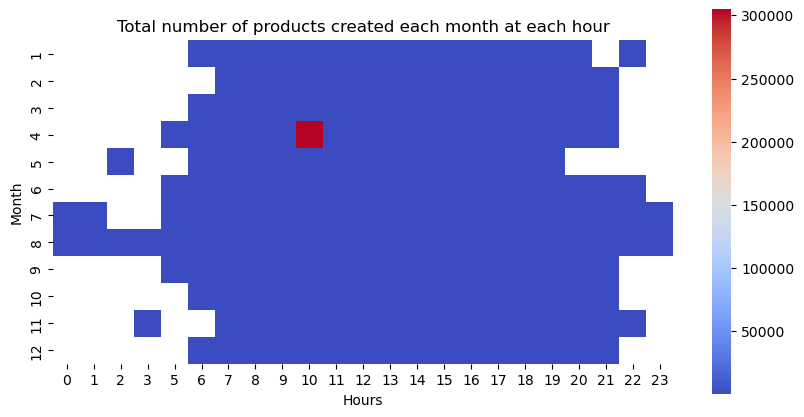

In [103]:
# Properties
plt.figure(figsize=(10,5))

# Heat map
sns.heatmap(df_time, cmap="coolwarm", fmt="g", square=True)

# Title of the plot, axes and labels
plt.xlabel("Hours")
plt.ylabel("Month")
plt.title("Total number of products created each month at each hour")

plt.show()

### 2. Your task is to investigate the evolution of the total number of items over time. You should draw a bar plot with the date (e.g., in yyyy-mm format) on the x-axis and the total number of items created during each month on the y-axis. Each bar in the plot should stack the number of items created by each country each month. Please make sure all bars are visible by choosing the appropriate scale for the -axis. Your output should look like the following plot

**Observaciones y comentarios:** Based on the provided figure, I have estimated the time evolution of the total quantity of products produced. With the exception of April 2021, the majority of the production occurred after June.

In [104]:
# Calculate the number of products created per hour and per month
df_months_year = df.groupby([df["created_at"].dt.strftime("%Y-%m"), "country"])["barcode"].count().unstack()
#df_months_year

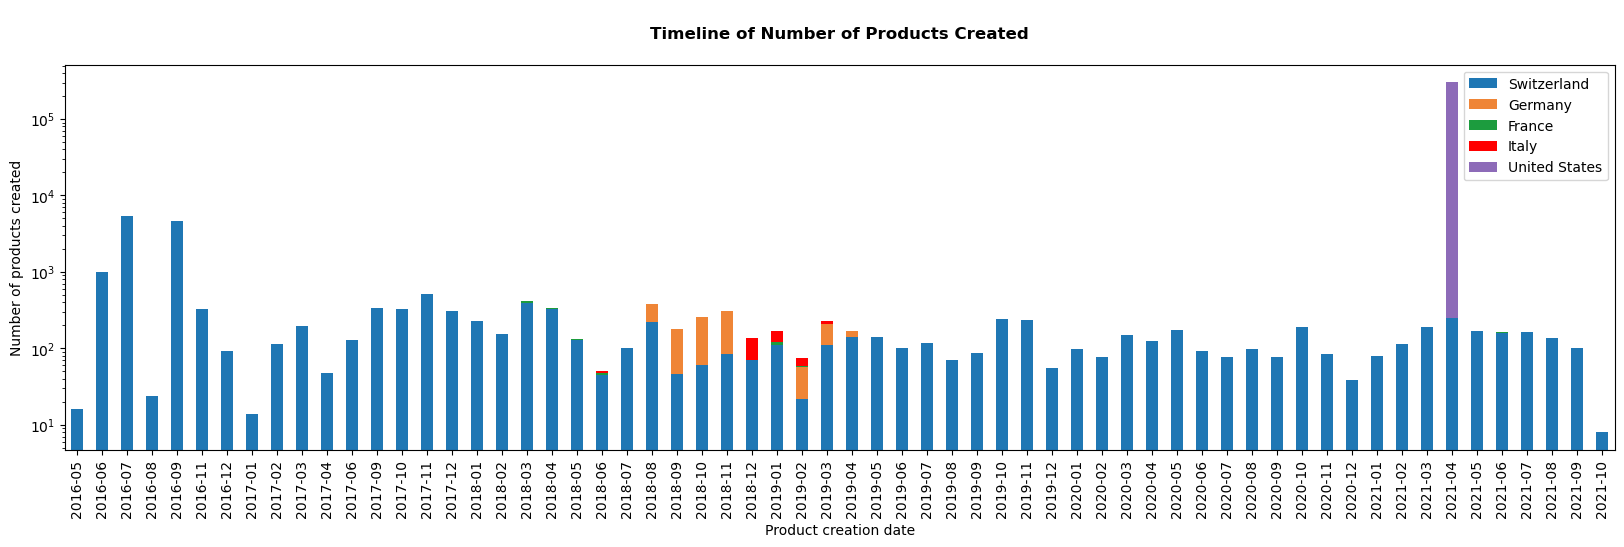

In [105]:
# Properties
color_dict = {"AT":"red", "CH":"#1F77B4", "DE":"#EF8536", "FR":"#1C9C3E", "IT":"red", "UK": "red", "US":"#8D6BB8"}         

# Bar plot
df_months_year.plot(kind="bar", stacked=True, figsize=(20,5), color=[color_dict[c] for c in df_months_year.columns])
plt.yscale("log")

# Title of the plot, axes and labels
plt.xlabel("Product creation date")
plt.ylabel("Number of products created")
plt.title("\nTimeline of Number of Products Created\n", fontweight="bold")
plt.legend([col.replace("IT", "Italy").replace("DE", "Germany").replace("US", "United States").replace("FR", "France").replace("CH", "Switzerland") for col in df_months_year.columns])

plt.show()

## F. EDA: Correlation analysis

Data analysis usually entails studying the strength of correlations in the data. This is
important because studying correlations helps to set expectations on which machine
learning models can better capture these correlations. A correlation analysis can be
quantitative (e.g., based on standard correlation measures) or qualitative (e.g., based on
visualizations). Also, methods of correlation analysis can vary from one data type to
another. In this task, you will do quantitative and qualitative correlation analysis for
some of the columns in the data.


### 1. Your task is to quantify the linear relationships between the energy_per_hundred and the per_hundred columns by analysing their correlation with each other.


**Remarks and comments:** As can be seen below, the results make sense, as the highest correlations are between the variables related to fat and energy, followed by the relationship between carbohydrates and energy, while the lowest correlations are found for variables such as salt, sodium, vitamin A and C.

In [106]:
filter = [col for col in df.columns if "per_hundred" in col and col not in ["fat_per_hundred_n", "carbohydrates_per_hundred_n","fiber_per_hundred_n","protein_per_hundred_n"]]  
correlations_hundred_variables = df[filter].corr().sort_values(by="energy_per_hundred", ascending=False)
ranking_correlation = correlations_hundred_variables["energy_per_hundred"]
del ranking_correlation["energy_per_hundred"]
ranking_correlation

energy_kcal_per_hundred                            1.000000
fat_per_hundred                                    0.772191
monounsaturated_fatty_acids_per_hundred            0.723876
saturated_fat_per_hundred                          0.636075
polyunsaturated_fatty_acids_per_hundred            0.610090
fatty_acids_total_saturated_per_hundred            0.566098
carbohydrates_per_hundred                          0.526447
sugars_added_per_hundred                           0.428913
sugars_per_hundred                                 0.353635
protein_per_hundred                                0.311165
fiber_per_hundred                                  0.272390
calcium_per_hundred                                0.055327
potassium_k_per_hundred                            0.053652
fatty_acids_total_trans_per_hundred                0.048334
vitamin_b2_riboflavin_per_hundred                  0.029570
cholesterol_per_hundred                            0.006514
iron_per_hundred                        

### 2. Your task is to reveal the true nature of the relationship, linear or non-linear, between variables, using visualizations.

Based on the correlation coefficients you found in the previous task, pick the three most correlated and the three least correlated nutrients (in absolute terms) with the energy_per_hundred column. Plot them against the energy_per_hundred column, using scatterplots. You should obtain these plots as subplots (with 2 rows and 3 columns) or as seaborn pairplots.

Please comment on the visual relationships in a markdown cell. Are they all linear? Are there still extreme values that, once removed, relationships would change?



**Remarks and comments:** The relation between energy in KJ and Kcal is positive and linear because of the modifications made in question C.4.b., as well as fat per hundred. While, when examining monounsaturated fatty acids per hundred, I have found that the linear relationship is both positive and high, around 0.7. It is important to note that there are outliers present in the data. As for vitamins and salt, I have observed a weaker relationship, which is expected. To explore the removal of outliers and visualize changes, I suggest using the least correlated variable, sodium. And after removing the outliers, I have seen a change from a negative correlation of -0.09 to a positive correlation of 0.03, in both cases weak. 

Text(0.5, 1.0, 'sodium_per_hundred')

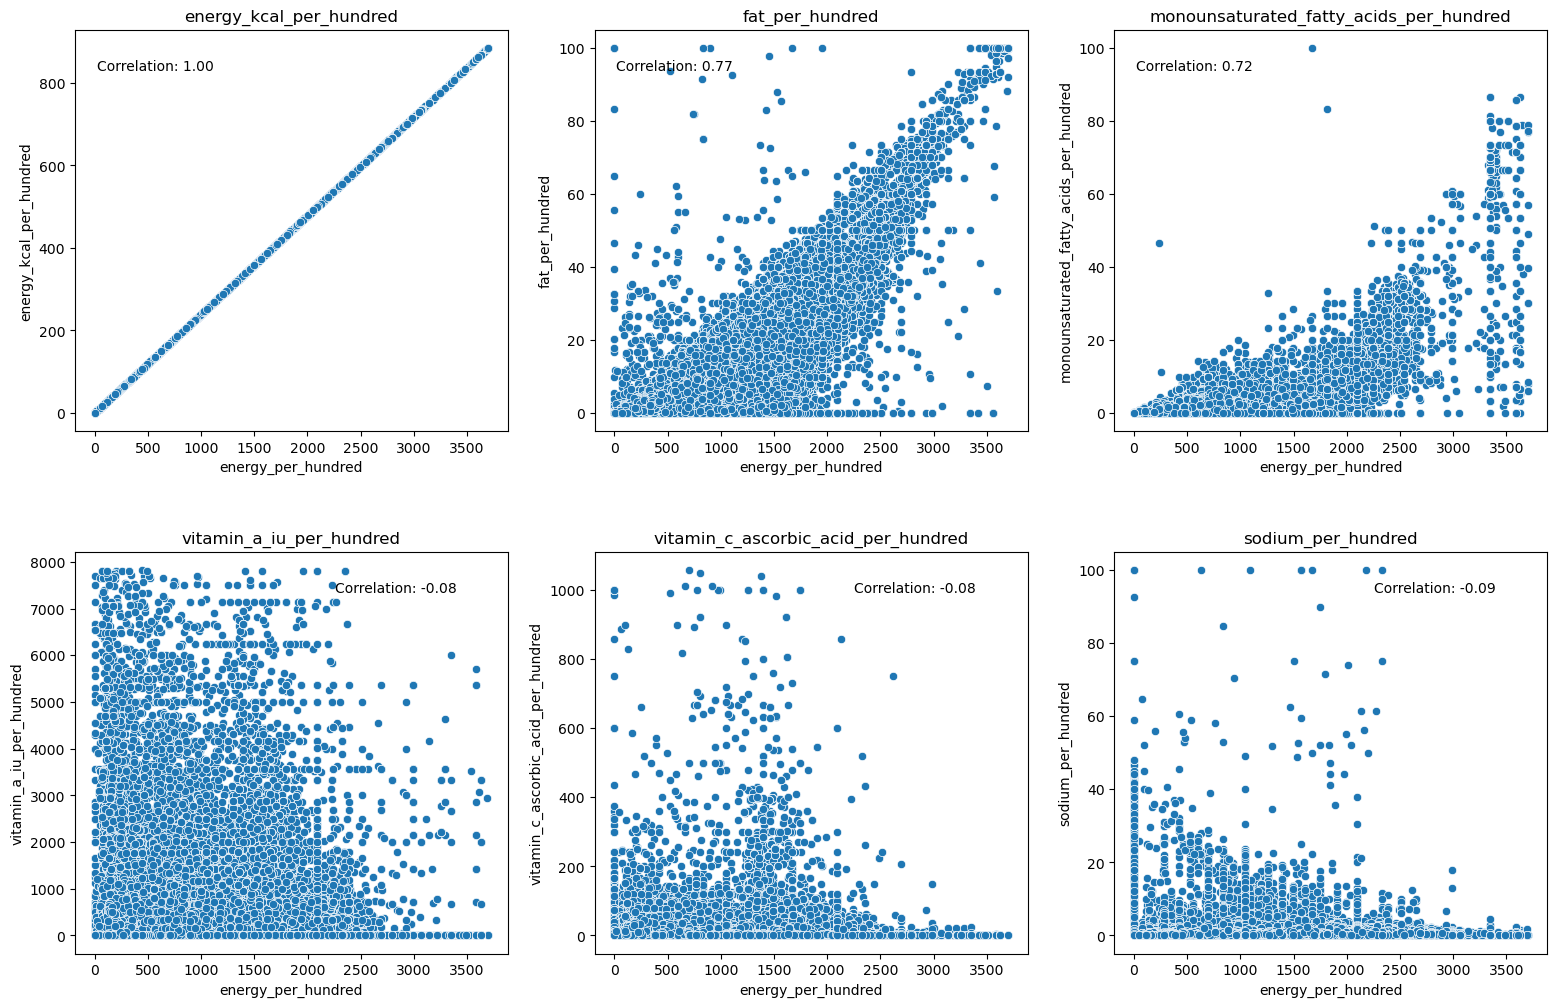

In [107]:
# Most and least correlated variables
most_correlated = ranking_correlation.head(3).index.tolist()
least_correlated = ranking_correlation.tail(3).index.tolist()

# Properties
fig, axes = plt.subplots(nrows=2,ncols=3, figsize=(19,12))
fig.subplots_adjust(hspace=0.3)

# Scatter plots
sns.scatterplot(x="energy_per_hundred", y=most_correlated[0], data=df, ax=axes[0,0])
sns.scatterplot(x="energy_per_hundred", y=most_correlated[1], data=df, ax=axes[0,1])
sns.scatterplot(x="energy_per_hundred", y=most_correlated[2], data=df, ax=axes[0,2])
sns.scatterplot(x="energy_per_hundred", y=least_correlated[0], data=df, ax=axes[1,0])
sns.scatterplot(x="energy_per_hundred", y=least_correlated[1], data=df, ax=axes[1,1])
sns.scatterplot(x="energy_per_hundred", y=least_correlated[2], data=df, ax=axes[1,2])

# Add correlation values to plots
axes[0,0].annotate("Correlation: {:.2f}".format(correlations_hundred_variables["energy_per_hundred"][most_correlated[0]]), xy=(0.05, 0.9), xycoords="axes fraction")
axes[0,1].annotate("Correlation: {:.2f}".format(correlations_hundred_variables["energy_per_hundred"][most_correlated[1]]), xy=(0.05, 0.9), xycoords="axes fraction")
axes[0,2].annotate("Correlation: {:.2f}".format(correlations_hundred_variables["energy_per_hundred"][most_correlated[2]]), xy=(0.05, 0.9), xycoords="axes fraction")
axes[1,0].annotate("Correlation: {:.2f}".format(correlations_hundred_variables["energy_per_hundred"][least_correlated[0]]), xy=(0.6, 0.9), xycoords="axes fraction")
axes[1,1].annotate("Correlation: {:.2f}".format(correlations_hundred_variables["energy_per_hundred"][least_correlated[1]]), xy=(0.6, 0.9), xycoords="axes fraction")
axes[1,2].annotate("Correlation: {:.2f}".format(correlations_hundred_variables["energy_per_hundred"][least_correlated[2]]), xy=(0.6, 0.9), xycoords="axes fraction")

# Title of the plot, axes and labels
axes[0,0].set_title(most_correlated[0])
axes[0,1].set_title(most_correlated[1])
axes[0,2].set_title(most_correlated[2])
axes[1,0].set_title(least_correlated[0])
axes[1,1].set_title(least_correlated[1])
axes[1,2].set_title(least_correlated[2])

In [108]:
# Example of the changes in correlation after the removal of outliers
outliers=df[least_correlated[2]].quantile(0.99)
df_removed_outliers = df[df[least_correlated[2]]<outliers]
df_removed_outliers= df_removed_outliers[["energy_per_hundred","sodium_per_hundred"]]
least_correlated_example = df_removed_outliers.corr().sort_values(by="energy_per_hundred", ascending=False)

least_correlated_example

energy_per_hundred  sodium_per_hundred
energy_per_hundred            1.000000            0.035236
sodium_per_hundred            0.035236            1.000000

### 3. Your task is to test the independence of two categorical variables statistically. Use the energy_per_hundred column to create a new variable that holds equal proportion of values in three categories low energy, medium energy and high energy. Test if the level of energy in the product is associated with the country where the product is produced

**Observations and comments:** In this exercise, I explored the relationship between the energy of products and their country of origin. To do this, I started by dividing the energy values into three equal categories based on their quantiles. I then created a table to visualise the energy range associated with each category and the number of products included in each category. I then calculated a contingency table to assess the statistical relationship between the two categorical variables. From the results, it is clear that there is a relationship between the country of origin of the product and its energy value.

In [109]:
# Create equal part categories based on quantiles
df["energy_category"] = pd.qcut(df["energy_per_hundred"], q=3, labels=["low energy", "medium energy", "high energy"])
resume_table = df.groupby("energy_category")["energy_per_hundred"].agg(["min", "max","count"])
resume_table

min      max   count
energy_category                         
low energy          0.0   560.66  108477
medium energy     561.0  1497.87  108418
high energy      1498.0  3700.00  108353

In [110]:
# Energy per hundred vs country
cross_table= pd.crosstab(df["energy_category"], df["country"])
cross_table

country            CH   DE  FR  IT      US
energy_category                           
low energy       6288  245  19  43  101882
medium energy    6356  255  22  42  101743
high energy      6871  366  13  68  101035

In [111]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(cross_table)
print(f"Chi-square test for the independence of the results:")
print(f"P-value = {p:.2f}")
print(f"Chi-square value = {chi2:.2f}")
print(f"Degree of freedom = {dof}")
print(f"Expected frequencies:")
print(expected)

Chi-square test for the independence of the results:
P-value = 0.00
Chi-square value = 77.35
Degree of freedom = 8
Expected frequencies:
[[6.50866002e+03 2.88829084e+02 1.80101277e+01 5.10286950e+01
  1.01610472e+05]
 [6.50512000e+03 2.88671992e+02 1.80003321e+01 5.10009408e+01
  1.01555207e+05]
 [6.50121998e+03 2.88498924e+02 1.79895403e+01 5.09703642e+01
  1.01494321e+05]]


## G. Advanced EDA

Thanks to the previous task, you now have a good intuition of what’s in your dataset and
have prepared it for the in-depth analysis that will follow. Your task is to do an in-depth
analysis of the organic vs. non-organic products distribution in the Open Food database.
Look for terms such as “bio” and “organic” in the product names. Your analysis should
address the following tasks

#### a) What is the total number of samples by country? Countries with very small sample size should be dropped from this analysis as their results may not be statistically significant.


**Observations and comments:** To classify the products, I first identified those related to the words "organic" and "bio". I considered that some of the product names might be in French or German as a result of the data filling done in Exercise B.3.c. To visualise these results, I created a table with the count of products according to the category "organic" or "bio", leaving these categories separate to see the difference. Finally, as indicated in the exercise, I only kept the countries with the most products in the sum of both categories.

In [112]:
df["category"] = df["product_name_en"].apply(lambda x: "organic" if "organic" in x.lower() or "organique" in x.lower() or "organisch" in x.lower() else ("bio" if "bio" in x.lower() else "non-organic"))
categories_df= df[df["category"].isin(["organic", "bio"])]
count = categories_df.groupby(["country", "category"]).size().reset_index(name="category_count")
count[count["category_count"] >10]

country category  category_count
0      CH      bio            1063
1      CH  organic             224
2      DE      bio              86
3      DE  organic              11
8      US      bio             730
9      US  organic           14978

#### b) Count the number of organic and non-organic products in each country. Is there a country with a higher percentage of organic products?


**Observations and comments:** To answer this question use what I have learned in chapters 2.4.5, 6. about reshape the data pivoting. In this way I was able to reorganise the results and calculate the percentage of organic and non-organic products and present them in a table. Germany is undoubtedly the country with the highest proportion of organic products, about 11%, followed by Switzerland and the United States, with 7% and 5% respectively.

In [113]:
# Replace bio per organic
df.loc[df["category"] == "bio", "category"] = "organic"

# Group by country and category and counts
product_category_counts = df.groupby(["country", "category"]).size().reset_index(name="category_count")

# Create a table for the statistics of country and category 
product_category_table = product_category_counts.pivot(index="country", columns="category", values="category_count")

# Calculate percentage in each category per country
product_category_table["perc_non-organic"]= product_category_table["non-organic"]/(product_category_table["organic"]+product_category_table["non-organic"])*100
product_category_table["perc_organic"]= product_category_table["organic"]/(product_category_table["organic"]+product_category_table["non-organic"])*100

print(product_category_table)

category  non-organic  organic  perc_non-organic  perc_organic
country                                                       
CH              18228     1287         93.405073      6.594927
DE                769       97         88.799076     11.200924
FR                 52        2         96.296296      3.703704
IT                148        5         96.732026      3.267974
US             288952    15708         94.844088      5.155912


#### c) Totals or portions don’t give a very detailed picture. Compare the distributions of the macronutrients between organic and non-organic products in each country. Your solution method should include appropriate visualisations in the subplots format. Note that bar charts aren’t not the best way to communicate distributions.


**Observations and comments:** The boxplot displays the distribution of organic (green) and non-organic (grey) macronutrient (i.e. fat, protein, carbohydrates and fiber) data across different countries. Carbohydrates and fiber show a wide and small range in all countries. Notably, non-organic products are significantly more than organic products. Interestingly, the average fat content of non-organic products in Switzerland, Germany, and the USA is similar. Germany has the highest number of organic products, while Italy has the lowest. Furthermore, France’s organic products have a high carbohydrate content. 

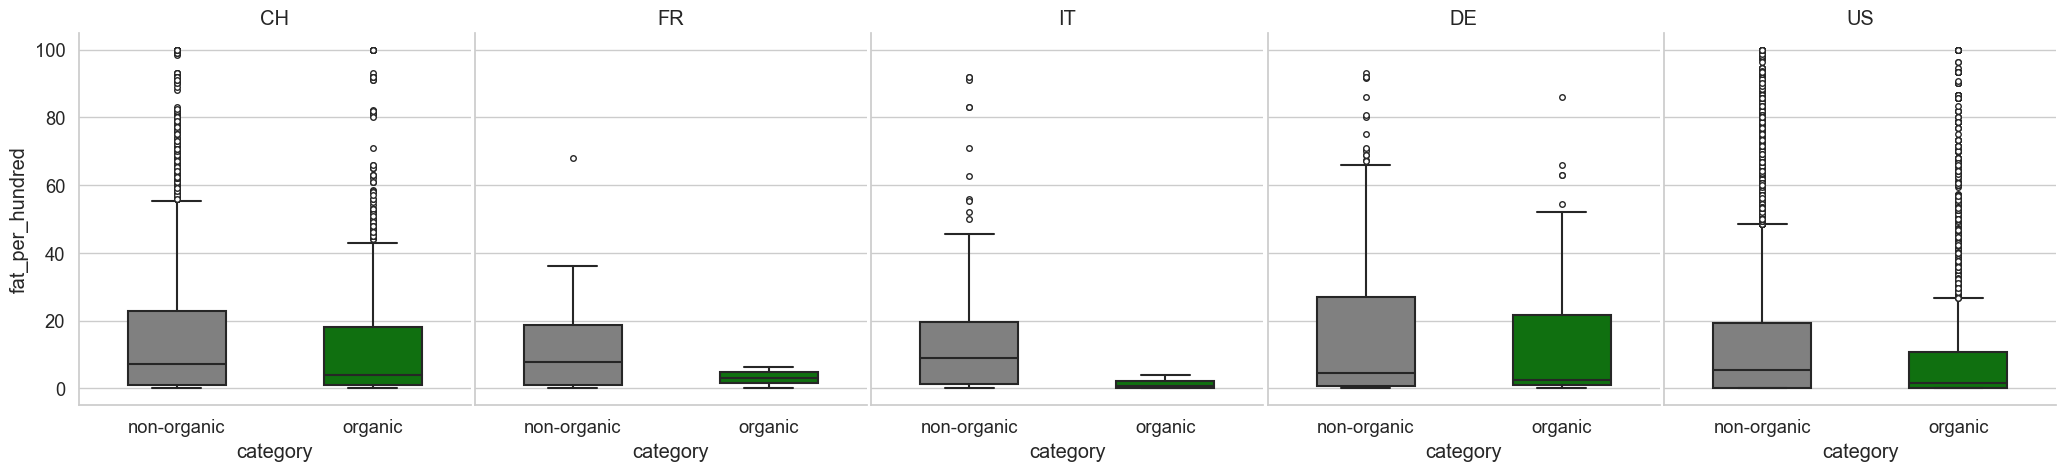

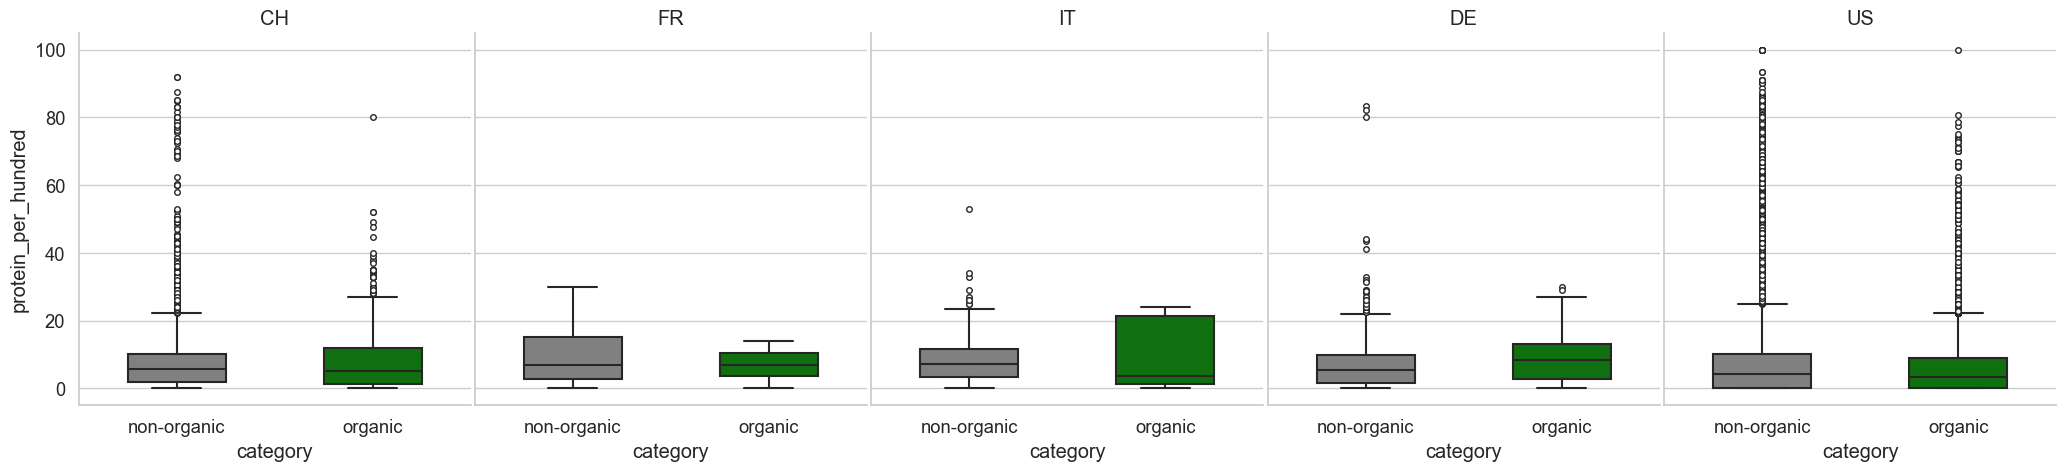

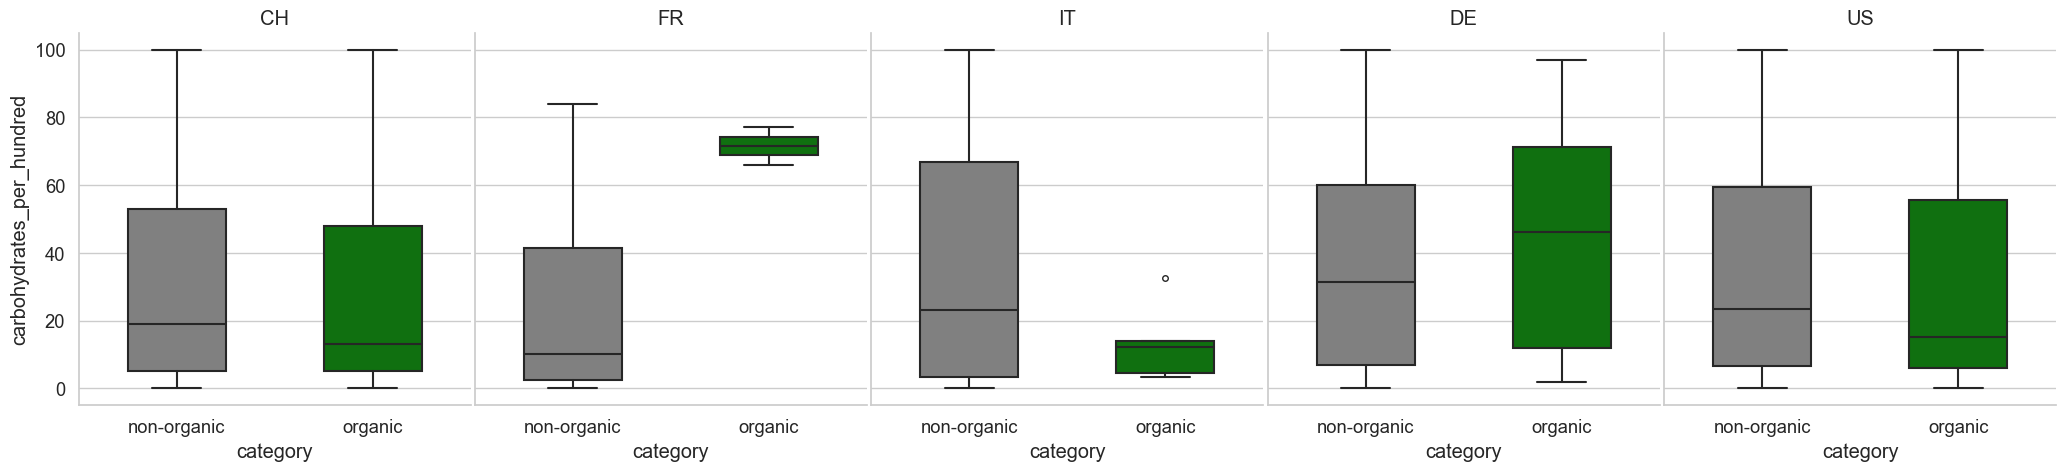

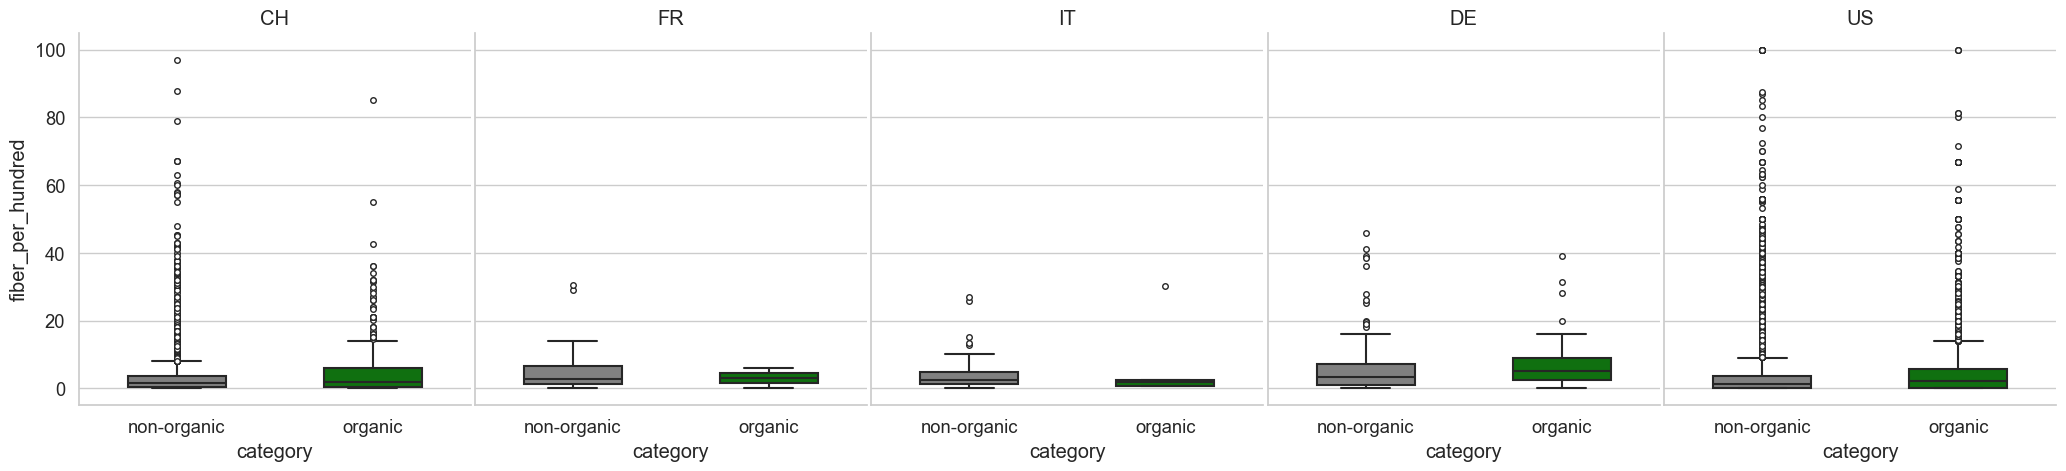

In [114]:
# Properties
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
order = ["non-organic", "organic"]
fig_height = 5
fig_width = 20
space_between_plots = 0.5
palette = {"non-organic": "grey", "organic": "green"}
flierprop = {"marker": "o", "markerfacecolor": "white", "markersize": 4}

# Boxplots 
# Create a grid of multiple plots based on subsets of a dataset for countries and boxplots using seaborn facetgrid (Ref. https://bit.ly/3KXrt1S)
fat = sns.FacetGrid(df, col="country", col_wrap=5, height=fig_height, aspect=fig_width/fig_height)
fat.map(sns.boxplot, "category", "fat_per_hundred", order=order, palette=palette,width=0.5, fliersize=5, flierprops=flierprop)
for i, ax in enumerate(fat.axes.flat):# Titles for each plot
    ax.set_title(df["country"].unique()[i])
fat.set_axis_labels("category", "fat_per_hundred")# x and y axis labels
plt.subplots_adjust(top=0.9, hspace=space_between_plots)# Spacing
fat.fig.set_size_inches(fig_width, fig_height)# Figure size

protein = sns.FacetGrid(df, col="country", col_wrap=5, height=fig_height, aspect=fig_width/fig_height)
protein.map(sns.boxplot, "category", "protein_per_hundred", order=order, palette=palette, width=0.5, fliersize=5, flierprops=flierprop)
for i, ax in enumerate(protein.axes.flat):
    ax.set_title(df["country"].unique()[i])
protein.set_axis_labels("category", "protein_per_hundred")
plt.subplots_adjust(top=0.9, hspace=space_between_plots)
protein.fig.set_size_inches(fig_width, fig_height)

carbohydrates = sns.FacetGrid(df, col="country", col_wrap=5, height=fig_height, aspect=fig_width/fig_height)
carbohydrates.map(sns.boxplot, "category", "carbohydrates_per_hundred", order=order, palette=palette, width=0.5, fliersize=5, flierprops=flierprop)
for i, ax in enumerate(carbohydrates.axes.flat):
    ax.set_title(df["country"].unique()[i])
carbohydrates.set_axis_labels("category", "carbohydrates_per_hundred")
plt.subplots_adjust(top=0.9, hspace=space_between_plots)
carbohydrates.fig.set_size_inches(fig_width, fig_height)

fiber = sns.FacetGrid(df, col="country", col_wrap=5, height=fig_height, aspect=fig_width/fig_height)
fiber.map(sns.boxplot, "category", "fiber_per_hundred", order=order, palette=palette, width=0.5, fliersize=5, flierprops=flierprop)
for i, ax in enumerate(fiber.axes.flat):
    ax.set_title(df["country"].unique()[i])
fiber.set_axis_labels("category", "fiber_per_hundred")
plt.subplots_adjust(top=0.9, hspace=space_between_plots)
fiber.fig.set_size_inches(fig_width, fig_height)

plt.show()